In [1]:
library(data.table)
library(plyr)

In [2]:
user.info = fread('/da4_data/play/Tapajit/authorinfo_all.csv', header = T)
str(user.info)

Classes 'data.table' and 'data.frame':	272143 obs. of  28 variables:
 $ login                : chr  "alabadoster" "AlabasterAxe" "alabbas-ali" "alabid" ...
 $ is_company           : int  0 0 0 0 1 0 1 0 1 1 ...
 $ is_bot               : int  0 0 0 0 0 0 0 0 0 0 ...
 $ no_project           : int  4 0 0 79 13 31 10 1 4 4 ...
 $ no_forked_project    : int  0 0 0 29 0 1 5 1 2 0 ...
 $ n_pkg_committed      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_direct_deps        : int  0 0 0 65 258 195 3 0 0 0 ...
 $ n_recursive_deps     : int  0 0 0 1358 1321 1373 119 0 0 0 ...
 $ n_issue              : int  1 2 5 17 1 1 2 2 2 1 ...
 $ n_pull_req           : int  0 2 5 17 0 0 2 0 0 0 ...
 $ n_issue_layer_0      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_pull_req_layer_0   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_issue_layer_1      : int  0 0 0 17 0 0 2 0 0 0 ...
 $ n_pull_req_layer_1   : int  0 0 0 17 0 0 2 0 0 0 ...
 $ n_issue_layer_more   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_pull_req_layer_more: int  0 0 0 0 0 0 0 0 0 

In [3]:
user.info = user.info[!duplicated(user.info$login),]
user.info = user.info[!(user.info$login == 'ghost'),]
user.info[which(user.info$login == 'gitter-badger'), 'is_bot'] = 1

user.info$n.non_pull_issue = user.info$n_issue - user.info$n_pull_req
user.info$n_pi_0 = user.info$n_issue_layer_0 - user.info$n_pull_req_layer_0
user.info$n_pi_1 = user.info$n_issue_layer_1 - user.info$n_pull_req_layer_1
user.info$n_pi_2 = user.info$n_issue_layer_more - user.info$n_pull_req_layer_more
user.info$n_pi_n = user.info$n_issue_layer_none - user.info$n_pull_req_layer_none

user.info$login = NULL
#user.info$is_bot = NULL
user.info$is_company = factor(user.info$is_company)
summary(user.info)

 is_company     is_bot            no_project       no_forked_project  
 0:187315   Min.   :0.0000000   Min.   :    0.00   Min.   :    0.000  
 1: 84827   1st Qu.:0.0000000   1st Qu.:    1.00   1st Qu.:    0.000  
            Median :0.0000000   Median :    8.00   Median :    1.000  
            Mean   :0.0001286   Mean   :   23.66   Mean   :    8.595  
            3rd Qu.:0.0000000   3rd Qu.:   26.00   3rd Qu.:    7.000  
            Max.   :1.0000000   Max.   :32852.00   Max.   :28224.000  
 n_pkg_committed    n_direct_deps     n_recursive_deps     n_issue         
 Min.   :  0.0000   Min.   :    0.0   Min.   :    0.0   Min.   :    1.000  
 1st Qu.:  0.0000   1st Qu.:    0.0   1st Qu.:    0.0   1st Qu.:    1.000  
 Median :  0.0000   Median :    2.0   Median :    1.0   Median :    1.000  
 Mean   :  0.0577   Mean   :  211.4   Mean   :  605.5   Mean   :    4.838  
 3rd Qu.:  0.0000   3rd Qu.:  130.0   3rd Qu.: 1396.0   3rd Qu.:    3.000  
 Max.   :491.0000   Max.   :38942.0   Max.   :1

In [6]:
library(lsa)
cosine(user.info$n_issue_pkg_l0, user.info$n_pkg_issue)

Loading required package: SnowballC


0.355476


In [106]:
sum(user.info$n_issue_layer_0)/sum(user.info$n_issue)
sum(user.info$n_issue_layer_1)/sum(user.info$n_issue)
sum(user.info$n_issue_layer_more)/sum(user.info$n_issue)
sum(user.info$n_issue_layer_none)/sum(user.info$n_issue)
sum(user.info$n_issue)

[1] 0.02650108

[1] 0.5321108

[1] 0.03892343

[1] 0.4024647

[1] 1316739

In [6]:
sum(user.info[user.info$n_issue ==1, ]$n_issue)
sum(user.info[user.info$n_issue ==1, ]$n_issue)/sum(user.info$n_issue)
sum(user.info[user.info$n_issue ==1, ]$n_pull_req)/sum(user.info$n_pull_req)

sum(user.info[user.info$n_issue >=10, ]$n_issue)/sum(user.info$n_issue)
sum(user.info[user.info$n_issue >=10, ]$n_pull_req)/sum(user.info$n_pull_req)

sum(user.info[user.info$n_pull_req ==0, ]$n_issue)/sum(user.info$n_issue)
sum(user.info[user.info$n.non_pull_issue == 0, ]$n_pull_req)/sum(user.info$n_pull_req)


[1] 139917

[1] 0.1062602

[1] 0.0457446

[1] 0.5981125

[1] 0.7466595

[1] 0.2866437

[1] 0.1696607

In [97]:
nrow(user.info[user.info$no_project >0, ])
nrow(user.info[user.info$n_pull_req >0, ])
nrow(user.info[user.info$n.non_pull_issue >0, ])

nrow(user.info[user.info$n_issue_layer_more >0, ])
nrow(user.info[user.info$n_pull_req_layer_more >0, ])
nrow(user.info[user.info$n_issue_layer_none >0, ])
nrow(user.info[user.info$n_pull_req_layer_none >0, ])
nrow(user.info[user.info$n_issue_layer_0 >0, ])
nrow(user.info[user.info$n_pull_req_layer_0 >0, ])
nrow(user.info[user.info$n_issue_layer_1 >0, ])
nrow(user.info[user.info$n_pull_req_layer_1 >0, ])
nrow(user.info[user.info$n_issue ==1, ])
nrow(user.info[user.info$n_issue ==1 & user.info$n_issue_layer_none == 1, ])


[1] 219945

[1] 87653

[1] 234063

[1] 21144

[1] 4643

[1] 215584

[1] 31330

[1] 4585

[1] 4381

[1] 89149

[1] 62262

[1] 139917

[1] 112420

In [96]:
nrow(user.info[user.info$no_project >0, ])/nrow(user.info)
nrow(user.info[user.info$n_pull_req >0, ])/nrow(user.info)
nrow(user.info[user.info$n.non_pull_issue >0, ])/nrow(user.info)

nrow(user.info[user.info$n_issue_layer_more >0, ])/nrow(user.info)
nrow(user.info[user.info$n_pull_req_layer_more >0, ])/nrow(user.info)
nrow(user.info[user.info$n_issue_layer_none >0, ])/nrow(user.info)
nrow(user.info[user.info$n_pull_req_layer_none >0, ])/nrow(user.info)
nrow(user.info[user.info$n_issue_layer_0 >0, ])/nrow(user.info)
nrow(user.info[user.info$n_pull_req_layer_0 >0, ])/nrow(user.info)
nrow(user.info[user.info$n_issue_layer_1 >0, ])/nrow(user.info)
nrow(user.info[user.info$n_pull_req_layer_1 >0, ])/nrow(user.info)
nrow(user.info[user.info$n_issue ==1, ])/nrow(user.info)
nrow(user.info[user.info$n_issue ==1 & user.info$n_issue_layer_none == 1, ])/nrow(user.info)


[1] 0.8081994

[1] 0.3220855

[1] 0.8600767

[1] 0.07769473

[1] 0.01706095

[1] 0.7921747

[1] 0.1151237

[1] 0.01684782

[1] 0.01609821

[1] 0.3275827

[1] 0.228785

[1] 0.5141323

[1] 0.4130932

In [102]:
nrow(user.info[user.info$n_issue >=10, ])
nrow(user.info[user.info$n_issue >=10, ])/nrow(user.info)

nrow(user.info[user.info$n_issue >=10 & user.info$no_project >0, ])


[1] 19376

[1] 0.07119812

[1] 18306

In [29]:
#uid = user.info
uid = user.info[user.info$n_issue >= 10, ]
#uid = user.info[user.info$n_issue_layer_more >0, ]
#uid = user.info[user.info$n_issue >= 10 & user.info$n_issue_layer_none >0, ]

round(sum(uid$n_issue_layer_0)/sum(uid$n_issue),3)
round(sum(uid$n_issue_layer_1)/sum(uid$n_issue),3)
round(sum(uid$n_issue_layer_more)/sum(uid$n_issue),3)
round(sum(uid$n_issue_layer_none)/sum(uid$n_issue),3)

[1] 0.039

[1] 0.688

[1] 0.039

[1] 0.234

In [147]:
round(sum(uid$n_pull_req_layer_0)/sum(uid$n_pull_req),3)
round(sum(uid$n_pull_req_layer_1)/sum(uid$n_pull_req),3)
round(sum(uid$n_pull_req_layer_more)/sum(uid$n_pull_req),3)
round(sum(uid$n_pull_req_layer_none)/sum(uid$n_pull_req),3)

[1] 0.038

[1] 0.794

[1] 0.016

[1] 0.152

In [41]:
nrow(user.info[user.info$n_issue_layer_0 >0 & user.info$n_pi_0 ==0, ])

[1] 2820

In [149]:
summary(uid)

 is_company     is_bot           no_project       no_forked_project 
 0:11248    Min.   :0.00e+00   Min.   :    1.00   Min.   :    0.00  
 1: 9896    1st Qu.:0.00e+00   1st Qu.:   15.00   1st Qu.:    4.00  
            Median :0.00e+00   Median :   34.00   Median :   11.00  
            Mean   :9.46e-05   Mean   :   66.22   Mean   :   28.45  
            3rd Qu.:0.00e+00   3rd Qu.:   73.00   3rd Qu.:   29.00  
            Max.   :1.00e+00   Max.   :32852.00   Max.   :28224.00  
 n_pkg_committed    n_direct_deps     n_recursive_deps    n_issue       
 Min.   :  0.0000   Min.   :    0.0   Min.   :    1    Min.   :   1.00  
 1st Qu.:  0.0000   1st Qu.:   25.0   1st Qu.: 1370    1st Qu.:   2.00  
 Median :  0.0000   Median :  187.0   Median : 1568    Median :   6.00  
 Mean   :  0.2793   Mean   :  468.9   Mean   : 1584    Mean   :  20.98  
 3rd Qu.:  0.0000   3rd Qu.:  812.2   3rd Qu.: 1864    3rd Qu.:  15.00  
 Max.   :236.0000   Max.   :38942.0   Max.   :17864    Max.   :4214.00  
   n_p

In [20]:
head(user.info[order(-user.info$n.non_pull_issue),])

login,is_company,is_bot,no_project,no_forked_project,n_pkg_committed,n_direct_deps,n_recursive_deps,n_issue,n_pull_req,...,n_pull_req_layer_0,n_issue_layer_1,n_pull_req_layer_1,n_issue_layer_more,n_pull_req_layer_more,n_issue_layer_none,n_pull_req_layer_none,n_pkg_issue,n_pkg_pull_req,n.non_pull_issue
arshaw,0,0,91,65,0,469,1190,2627,3,...,0,2627,3,0,0,0,0,2,2,2624
babel-bot,1,1,0,0,0,0,0,1772,0,...,0,0,0,0,0,1772,0,4,0,1772
gaearon,1,0,801,617,21,2069,2722,4214,2514,...,80,3984,2427,19,0,23,7,99,54,1700
greenkeeper[bot],0,1,0,0,0,0,0,9755,8101,...,0,0,0,0,0,9755,8101,452,437,1654
hueniverse,1,0,266,121,17,457,1782,1977,360,...,16,1767,342,5,0,8,2,42,22,1617
guybedford,0,0,415,229,4,1419,1890,1666,383,...,1,1572,382,9,0,6,0,90,62,1283


In [4]:
user.info.b = user.info[user.info$is_bot ==1, ]
user.info.nb = user.info[user.info$is_bot ==0, ]
nrow(user.info.b)
nrow(user.info.nb)
#summary(user.info.b)
#summary(user.info.nb)

[1] 35

[1] 272107

In [5]:
user.info.nb$is_bot = NULL

In [39]:
colSums(user.info.nb[,2:ncol(user.info.nb)])

is_company                is_bot            no_project 
                84813                     0               6374793 
    no_forked_project       n_pkg_committed         n_direct_deps 
              2298484                 15153              57437779 
     n_recursive_deps               n_issue            n_pull_req 
            164710534               1285831                491963 
      n_issue_layer_0    n_pull_req_layer_0       n_issue_layer_1 
                27579                 17510                695336 
   n_pull_req_layer_1    n_issue_layer_more n_pull_req_layer_more 
               395534                 51249                 10386 
   n_issue_layer_none n_pull_req_layer_none           n_pkg_issue 
               511667                 68533                575959 
       n_pkg_pull_req      n.non_pull_issue                n_pi_0 
               169356                793868                 10069 
               n_pi_1                n_pi_2                n_pi_n 
               299802                 40863                443134

In [280]:
nrow(user.info.nb[user.info.nb$n_pkg_committed> 0, ])/nrow(user.info.nb)
nrow(user.info.nb[user.info.nb$n_direct_deps> 0, ])/nrow(user.info.nb)
nrow(user.info.nb[user.info.nb$n_recursive_deps> 0, ])/nrow(user.info.nb)
nrow(user.info.nb[user.info.nb$no_project> 0, ])/nrow(user.info.nb)

[1] 0.0189521

[1] 0.5564245

[1] 0.5066573

[1] 0.8082409

In [281]:
nrow(user.info.c[user.info.c$n_pkg_committed> 0, ])/nrow(user.info.c)
nrow(user.info.c[user.info.c$n_direct_deps> 0, ])/nrow(user.info.c)
nrow(user.info.c[user.info.c$n_recursive_deps> 0, ])/nrow(user.info.c)
nrow(user.info.c[user.info.c$no_project> 0, ])/nrow(user.info.c)

[1] 0.0318937

[1] 0.713334

[1] 0.6643911

[1] 0.917548

In [282]:
nrow(user.info.i[user.info.i$n_pkg_committed> 0, ])/nrow(user.info.i)
nrow(user.info.i[user.info.i$n_direct_deps> 0, ])/nrow(user.info.i)
nrow(user.info.i[user.info.i$n_recursive_deps> 0, ])/nrow(user.info.i)
nrow(user.info.i[user.info.i$no_project> 0, ])/nrow(user.info.i)

[1] 0.01309172

[1] 0.4853706

[1] 0.4352302

[1] 0.7587429

In [18]:
user.info.c = user.info.nb[user.info.nb$is_company ==1, ]
user.info.i = user.info.nb[user.info.nb$is_company ==0, ]
nrow(user.info.c)
nrow(user.info.i)

[1] 84813

[1] 187294

In [286]:
user.info.nb[user.info.nb$login =='andy-ms',]

login,is_company,is_bot,no_project,no_forked_project,n_pkg_committed,n_direct_deps,n_recursive_deps,n_issue,n_pull_req,...,n_pull_req_layer_more,n_issue_layer_none,n_pull_req_layer_none,n_pkg_issue,n_pkg_pull_req,n.non_pull_issue,n_pi_0,n_pi_1,n_pi_2,n_pi_n
andy-ms,1,0,167,136,1,747,1211,5068,4381,...,0,4,0,12,10,687,0,683,0,4


In [46]:
summary(user.info.c)
summary(user.info.i)


    login             is_company     is_bot    no_project      
 Length:84813       Min.   :1    Min.   :0   Min.   :    0.00  
 Class :character   1st Qu.:1    1st Qu.:0   1st Qu.:    6.00  
 Mode  :character   Median :1    Median :0   Median :   19.00  
                    Mean   :1    Mean   :0   Mean   :   39.72  
                    3rd Qu.:1    3rd Qu.:0   3rd Qu.:   46.00  
                    Max.   :1    Max.   :0   Max.   :11591.00  
 no_forked_project n_pkg_committed     n_direct_deps     n_recursive_deps
 Min.   :   0.00   Min.   :  0.00000   Min.   :    0.0   Min.   :   0.0  
 1st Qu.:   1.00   1st Qu.:  0.00000   1st Qu.:    0.0   1st Qu.:   0.0  
 Median :   5.00   Median :  0.00000   Median :   22.0   Median :1175.0  
 Mean   :  14.99   Mean   :  0.09902   Mean   :  321.4   Mean   : 850.6  
 3rd Qu.:  15.00   3rd Qu.:  0.00000   3rd Qu.:  494.0   3rd Qu.:1524.0  
 Max.   :5142.00   Max.   :236.00000   Max.   :38942.0   Max.   :9724.0  
    n_issue           n_pull_req  

    login             is_company     is_bot    no_project     
 Length:187294      Min.   :0    Min.   :0   Min.   :   0.00  
 Class :character   1st Qu.:0    1st Qu.:0   1st Qu.:   1.00  
 Mode  :character   Median :0    Median :0   Median :   5.00  
                    Mean   :0    Mean   :0   Mean   :  16.05  
                    3rd Qu.:0    3rd Qu.:0   3rd Qu.:  17.00  
                    Max.   :0    Max.   :0   Max.   :6354.00  
 no_forked_project  n_pkg_committed     n_direct_deps    n_recursive_deps
 Min.   :   0.000   Min.   :  0.00000   Min.   :   0.0   Min.   :   0.0  
 1st Qu.:   0.000   1st Qu.:  0.00000   1st Qu.:   0.0   1st Qu.:   0.0  
 Median :   1.000   Median :  0.00000   Median :   0.0   Median :   0.0  
 Mean   :   5.485   Mean   :  0.03607   Mean   : 161.1   Mean   : 494.2  
 3rd Qu.:   5.000   3rd Qu.:  0.00000   3rd Qu.:  49.0   3rd Qu.:1330.0  
 Max.   :2421.000   Max.   :139.00000   Max.   :4038.0   Max.   :6486.0  
    n_issue           n_pull_req       n_

In [42]:
colSums(user.info.c[,2:ncol(user.info.c)])
colSums(user.info.i[,2:ncol(user.info.i)])


is_company                is_bot            no_project 
                84813                     0               3368905 
    no_forked_project       n_pkg_committed         n_direct_deps 
              1271097                  8398              27261618 
     n_recursive_deps               n_issue            n_pull_req 
             72143211                616946                278896 
      n_issue_layer_0    n_pull_req_layer_0       n_issue_layer_1 
                17443                 11114                397004 
   n_pull_req_layer_1    n_issue_layer_more n_pull_req_layer_more 
               231042                 25400                  5281 
   n_issue_layer_none n_pull_req_layer_none           n_pkg_issue 
               177099                 31459                232807 
       n_pkg_pull_req      n.non_pull_issue 
                84213                338050

is_company                is_bot            no_project 
                    0                     0               3005888 
    no_forked_project       n_pkg_committed         n_direct_deps 
              1027387                  6755              30176161 
     n_recursive_deps               n_issue            n_pull_req 
             92567323                668885                213067 
      n_issue_layer_0    n_pull_req_layer_0       n_issue_layer_1 
                10136                  6396                298332 
   n_pull_req_layer_1    n_issue_layer_more n_pull_req_layer_more 
               164492                 25849                  5105 
   n_issue_layer_none n_pull_req_layer_none           n_pkg_issue 
               334568                 37074                343152 
       n_pkg_pull_req      n.non_pull_issue 
                85143                455818

In [50]:
diag(cor(user.info.c[,4:ncol(user.info.c)], user.info.i[sample(nrow(user.info.i), nrow(user.info.c)) ,4:ncol(user.info.i)], method = 'spearman', use='complete.obs'))

no_project     no_forked_project       n_pkg_committed 
         0.0032061543          0.0013835523          0.0025178420 
        n_direct_deps      n_recursive_deps               n_issue 
         0.0032730604          0.0019811993          0.0017429871 
           n_pull_req       n_issue_layer_0    n_pull_req_layer_0 
         0.0020618657          0.0024039371          0.0022565291 
      n_issue_layer_1    n_pull_req_layer_1    n_issue_layer_more 
         0.0043421703          0.0021156171         -0.0002173269 
n_pull_req_layer_more    n_issue_layer_none n_pull_req_layer_none 
        -0.0089482099          0.0041931536          0.0046004818 
          n_pkg_issue        n_pkg_pull_req      n.non_pull_issue 
        -0.0010573063          0.0013876023         -0.0054058221 
               n_pi_0                n_pi_1                n_pi_2 
         0.0015230385          0.0021970013          0.0018924244 
               n_pi_n 
        -0.0004360452

In [66]:
nrow(user.info.c[user.info.c$no_project >0, ])/nrow(user.info.c)
nrow(user.info.c[user.info.c$n_pull_req >0, ])/nrow(user.info.c)
nrow(user.info.c[user.info.c$n.non_pull_issue >0, ])/nrow(user.info.c)

nrow(user.info.c[user.info.c$n_issue_layer_more >0, ])/nrow(user.info.c)
nrow(user.info.c[user.info.c$n_pull_req_layer_more >0, ])/nrow(user.info.c)
nrow(user.info.c[user.info.c$n_issue_layer_none >0, ])/nrow(user.info.c)
nrow(user.info.c[user.info.c$n_pull_req_layer_none >0, ])/nrow(user.info.c)
nrow(user.info.c[user.info.c$n_issue_layer_0 >0, ])/nrow(user.info.c)
nrow(user.info.c[user.info.c$n_pull_req_layer_0 >0, ])/nrow(user.info.c)
nrow(user.info.c[user.info.c$n_issue_layer_1 >0, ])/nrow(user.info.c)
nrow(user.info.c[user.info.c$n_pull_req_layer_1 >0, ])/nrow(user.info.c)

[1] 0.917548

[1] 0.4350159

[1] 0.8344829

[1] 0.1166684

[1] 0.02685909

[1] 0.738118

[1] 0.1489276

[1] 0.02794383

[1] 0.02651716

[1] 0.4487048

[1] 0.3273437

In [67]:
nrow(user.info.i[user.info.i$no_project >0, ])/nrow(user.info.i)
nrow(user.info.i[user.info.i$n_pull_req >0, ])/nrow(user.info.i)
nrow(user.info.i[user.info.i$n.non_pull_issue >0, ])/nrow(user.info.i)

nrow(user.info.i[user.info.i$n_issue_layer_more >0, ])/nrow(user.info.i)
nrow(user.info.i[user.info.i$n_pull_req_layer_more >0, ])/nrow(user.info.i)
nrow(user.info.i[user.info.i$n_issue_layer_none >0, ])/nrow(user.info.i)
nrow(user.info.i[user.info.i$n_pull_req_layer_none >0, ])/nrow(user.info.i)
nrow(user.info.i[user.info.i$n_issue_layer_0 >0, ])/nrow(user.info.i)
nrow(user.info.i[user.info.i$n_pull_req_layer_0 >0, ])/nrow(user.info.i)
nrow(user.info.i[user.info.i$n_issue_layer_1 >0, ])/nrow(user.info.i)
nrow(user.info.i[user.info.i$n_pull_req_layer_1 >0, ])/nrow(user.info.i)

[1] 0.7587429

[1] 0.2708843

[1] 0.8717311

[1] 0.06004997

[1] 0.01261653

[1] 0.8166679

[1] 0.09976294

[1] 0.01179429

[1] 0.01135114

[1] 0.2727423

[1] 0.184149

In [78]:
user.info.c = user.info.c[,c(9:18,21:25)]/unlist(user.info.c[,c(19)])
user.info.i = user.info.i[,c(9:18,21:25)]/unlist(user.info.i[,c(19)])


In [20]:
ks.test(user.info.c$no_forked_project, user.info.i$no_forked_project, alternative = "less")


Warning message in ks.test(user.info.c$no_forked_project, user.info.i$no_forked_project, :
"p-value will be approximate in the presence of ties"


	Two-sample Kolmogorov-Smirnov test

data:  user.info.c$no_forked_project and user.info.i$no_forked_project
D^- = 0.27858, p-value < 2.2e-16
alternative hypothesis: the CDF of x lies below that of y


In [79]:
ks.test(user.info.c$n_issue, user.info.i$n_issue, alternative = "less")
wilcox.test(user.info.c$n_issue, user.info.i$n_issue, alternative = "two.sided")
ks.test(user.info.c$n_pull_req, user.info.i$n_pull_req, alternative = "less")
wilcox.test(user.info.c$n_pull_req, user.info.i$n_pull_req, alternative = "two.sided")
ks.test(user.info.c$n.non_pull_issue, user.info.i$n.non_pull_issue, alternative = "less")
wilcox.test(user.info.c$n.non_pull_issue, user.info.i$n.non_pull_issue, alternative = "two.sided")

Warning message in ks.test(user.info.c$n_issue, user.info.i$n_issue, alternative = "less"):
"p-value will be approximate in the presence of ties"


	Two-sample Kolmogorov-Smirnov test

data:  user.info.c$n_issue and user.info.i$n_issue
D^- = 0.087241, p-value < 2.2e-16
alternative hypothesis: the CDF of x lies below that of y



	Wilcoxon rank sum test with continuity correction

data:  user.info.c$n_issue and user.info.i$n_issue
W = 8582800000, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


Warning message in ks.test(user.info.c$n_pull_req, user.info.i$n_pull_req, alternative = "less"):
"p-value will be approximate in the presence of ties"


	Two-sample Kolmogorov-Smirnov test

data:  user.info.c$n_pull_req and user.info.i$n_pull_req
D^- = 0.16414, p-value < 2.2e-16
alternative hypothesis: the CDF of x lies below that of y



	Wilcoxon rank sum test with continuity correction

data:  user.info.c$n_pull_req and user.info.i$n_pull_req
W = 9218700000, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


Warning message in ks.test(user.info.c$n.non_pull_issue, user.info.i$n.non_pull_issue, :
"p-value will be approximate in the presence of ties"


	Two-sample Kolmogorov-Smirnov test

data:  user.info.c$n.non_pull_issue and user.info.i$n.non_pull_issue
D^- = 0.011253, p-value = 3.798e-07
alternative hypothesis: the CDF of x lies below that of y



	Wilcoxon rank sum test with continuity correction

data:  user.info.c$n.non_pull_issue and user.info.i$n.non_pull_issue
W = 7433300000, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [80]:
ks.test(user.info.c$n_issue_layer_0, user.info.i$n_issue_layer_0, alternative = "less")
wilcox.test(user.info.c$n_issue_layer_0, user.info.i$n_issue_layer_0, alternative = "two.sided")
ks.test(user.info.c$n_pull_req_layer_0, user.info.i$n_pull_req_layer_0, alternative = "less")
wilcox.test(user.info.c$n_pull_req_layer_0, user.info.i$n_pull_req_layer_0, alternative = "two.sided")
ks.test(user.info.c$n_pi_0, user.info.i$n_pi_0, alternative = "less")
wilcox.test(user.info.c$n_pi_0, user.info.i$n_pi_0, alternative = "two.sided")

Warning message in ks.test(user.info.c$n_issue_layer_0, user.info.i$n_issue_layer_0, :
"p-value will be approximate in the presence of ties"


	Two-sample Kolmogorov-Smirnov test

data:  user.info.c$n_issue_layer_0 and user.info.i$n_issue_layer_0
D^- = 0.01616, p-value = 5.727e-14
alternative hypothesis: the CDF of x lies below that of y



	Wilcoxon rank sum test with continuity correction

data:  user.info.c$n_issue_layer_0 and user.info.i$n_issue_layer_0
W = 8070400000, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


Warning message in ks.test(user.info.c$n_pull_req_layer_0, user.info.i$n_pull_req_layer_0, :
"p-value will be approximate in the presence of ties"


	Two-sample Kolmogorov-Smirnov test

data:  user.info.c$n_pull_req_layer_0 and user.info.i$n_pull_req_layer_0
D^- = 0.01517, p-value = 2.141e-12
alternative hypothesis: the CDF of x lies below that of y



	Wilcoxon rank sum test with continuity correction

data:  user.info.c$n_pull_req_layer_0 and user.info.i$n_pull_req_layer_0
W = 8062600000, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


Warning message in ks.test(user.info.c$n_pi_0, user.info.i$n_pi_0, alternative = "less"):
"p-value will be approximate in the presence of ties"


	Two-sample Kolmogorov-Smirnov test

data:  user.info.c$n_pi_0 and user.info.i$n_pi_0
D^- = 0.0069182, p-value = 0.003742
alternative hypothesis: the CDF of x lies below that of y



	Wilcoxon rank sum test with continuity correction

data:  user.info.c$n_pi_0 and user.info.i$n_pi_0
W = 7997400000, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [81]:
ks.test(user.info.c$n_issue_layer_1, user.info.i$n_issue_layer_1, alternative = "less")
wilcox.test(user.info.c$n_issue_layer_1, user.info.i$n_issue_layer_1, alternative = "two.sided")
ks.test(user.info.c$n_pull_req_layer_1, user.info.i$n_pull_req_layer_1, alternative = "less")
wilcox.test(user.info.c$n_pull_req_layer_1, user.info.i$n_pull_req_layer_1, alternative = "two.sided")
ks.test(user.info.c$n_pi_1, user.info.i$n_pi_1, alternative = "less")
wilcox.test(user.info.c$n_pi_1, user.info.i$n_pi_1, alternative = "two.sided")

Warning message in ks.test(user.info.c$n_issue_layer_1, user.info.i$n_issue_layer_1, :
"p-value will be approximate in the presence of ties"


	Two-sample Kolmogorov-Smirnov test

data:  user.info.c$n_issue_layer_1 and user.info.i$n_issue_layer_1
D^- = 0.17596, p-value < 2.2e-16
alternative hypothesis: the CDF of x lies below that of y



	Wilcoxon rank sum test with continuity correction

data:  user.info.c$n_issue_layer_1 and user.info.i$n_issue_layer_1
W = 9342200000, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


Warning message in ks.test(user.info.c$n_pull_req_layer_1, user.info.i$n_pull_req_layer_1, :
"p-value will be approximate in the presence of ties"


	Two-sample Kolmogorov-Smirnov test

data:  user.info.c$n_pull_req_layer_1 and user.info.i$n_pull_req_layer_1
D^- = 0.1432, p-value < 2.2e-16
alternative hypothesis: the CDF of x lies below that of y



	Wilcoxon rank sum test with continuity correction

data:  user.info.c$n_pull_req_layer_1 and user.info.i$n_pull_req_layer_1
W = 9059500000, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


Warning message in ks.test(user.info.c$n_pi_1, user.info.i$n_pi_1, alternative = "less"):
"p-value will be approximate in the presence of ties"


	Two-sample Kolmogorov-Smirnov test

data:  user.info.c$n_pi_1 and user.info.i$n_pi_1
D^- = 0.12192, p-value < 2.2e-16
alternative hypothesis: the CDF of x lies below that of y



	Wilcoxon rank sum test with continuity correction

data:  user.info.c$n_pi_1 and user.info.i$n_pi_1
W = 8.887e+09, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [82]:
ks.test(user.info.c$n_issue_layer_more, user.info.i$n_issue_layer_more, alternative = "less")
wilcox.test(user.info.c$n_issue_layer_more, user.info.i$n_issue_layer_more, alternative = "two.sided")
ks.test(user.info.c$n_pull_req_layer_more, user.info.i$n_pull_req_layer_more, alternative = "less")
wilcox.test(user.info.c$n_pull_req_layer_more, user.info.i$n_pull_req_layer_more, alternative = "two.sided")
ks.test(user.info.c$n_pi_2, user.info.i$n_pi_2, alternative = "less")
wilcox.test(user.info.c$n_pi_2, user.info.i$n_pi_2, alternative = "two.sided")

Warning message in ks.test(user.info.c$n_issue_layer_more, user.info.i$n_issue_layer_more, :
"p-value will be approximate in the presence of ties"


	Two-sample Kolmogorov-Smirnov test

data:  user.info.c$n_issue_layer_more and user.info.i$n_issue_layer_more
D^- = 0.056618, p-value < 2.2e-16
alternative hypothesis: the CDF of x lies below that of y



	Wilcoxon rank sum test with continuity correction

data:  user.info.c$n_issue_layer_more and user.info.i$n_issue_layer_more
W = 8384400000, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


Warning message in ks.test(user.info.c$n_pull_req_layer_more, user.info.i$n_pull_req_layer_more, :
"p-value will be approximate in the presence of ties"


	Two-sample Kolmogorov-Smirnov test

data:  user.info.c$n_pull_req_layer_more and user.info.i$n_pull_req_layer_more
D^- = 0.014253, p-value = 4.998e-11
alternative hypothesis: the CDF of x lies below that of y



	Wilcoxon rank sum test with continuity correction

data:  user.info.c$n_pull_req_layer_more and user.info.i$n_pull_req_layer_more
W = 8055200000, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


Warning message in ks.test(user.info.c$n_pi_2, user.info.i$n_pi_2, alternative = "less"):
"p-value will be approximate in the presence of ties"


	Two-sample Kolmogorov-Smirnov test

data:  user.info.c$n_pi_2 and user.info.i$n_pi_2
D^- = 0.049625, p-value < 2.2e-16
alternative hypothesis: the CDF of x lies below that of y



	Wilcoxon rank sum test with continuity correction

data:  user.info.c$n_pi_2 and user.info.i$n_pi_2
W = 8330300000, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [83]:
ks.test(user.info.c$n_issue_layer_none, user.info.i$n_issue_layer_none, alternative = "less")
wilcox.test(user.info.c$n_issue_layer_none, user.info.i$n_issue_layer_none, alternative = "two.sided")
ks.test(user.info.c$n_pull_req_layer_none, user.info.i$n_pull_req_layer_none, alternative = "less")
wilcox.test(user.info.c$n_pull_req_layer_none, user.info.i$n_pull_req_layer_none, alternative = "two.sided")
ks.test(user.info.c$n_pi_n, user.info.i$n_pi_n, alternative = "less")
wilcox.test(user.info.c$n_pi_n, user.info.i$n_pi_n, alternative = "two.sided")

Warning message in ks.test(user.info.c$n_issue_layer_none, user.info.i$n_issue_layer_none, :
"p-value will be approximate in the presence of ties"


	Two-sample Kolmogorov-Smirnov test

data:  user.info.c$n_issue_layer_none and user.info.i$n_issue_layer_none
D^- = 3.7596e-05, p-value = 0.9998
alternative hypothesis: the CDF of x lies below that of y



	Wilcoxon rank sum test with continuity correction

data:  user.info.c$n_issue_layer_none and user.info.i$n_issue_layer_none
W = 6681900000, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


Warning message in ks.test(user.info.c$n_pull_req_layer_none, user.info.i$n_pull_req_layer_none, :
"p-value will be approximate in the presence of ties"


	Two-sample Kolmogorov-Smirnov test

data:  user.info.c$n_pull_req_layer_none and user.info.i$n_pull_req_layer_none
D^- = 0.049165, p-value < 2.2e-16
alternative hypothesis: the CDF of x lies below that of y



	Wilcoxon rank sum test with continuity correction

data:  user.info.c$n_pull_req_layer_none and user.info.i$n_pull_req_layer_none
W = 8313500000, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


Warning message in ks.test(user.info.c$n_pi_n, user.info.i$n_pi_n, alternative = "less"):
"p-value will be approximate in the presence of ties"


	Two-sample Kolmogorov-Smirnov test

data:  user.info.c$n_pi_n and user.info.i$n_pi_n
D^- = 1.1791e-05, p-value = 1
alternative hypothesis: the CDF of x lies below that of y



	Wilcoxon rank sum test with continuity correction

data:  user.info.c$n_pi_n and user.info.i$n_pi_n
W = 6.561e+09, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [6]:
library(ggplot2)
library(reshape2)
require(scales)


Attaching package: 'reshape2'

The following objects are masked from 'package:data.table':

    dcast, melt

Loading required package: scales


In [121]:
p.df = user.info.nb[,c(2, 9, 10, 21)]
str(p.df)
colnames(p.df) = c('is.company', 'no.issue', 'no.pull.request', 'no.non-pull.issues')
p.df$is.company = factor(ifelse(p.df$is.company == 0, 'independent-user', 'company-user'))

p.df[,2:4] <- log10(p.df[,2:4]+1)

Classes 'data.table' and 'data.frame':	272107 obs. of  4 variables:
 $ is_company      : int  0 0 0 0 1 0 1 0 1 1 ...
 $ n_issue         : int  1 2 5 17 1 1 2 2 2 1 ...
 $ n_pull_req      : int  0 2 5 17 0 0 2 0 0 0 ...
 $ n.non_pull_issue: int  1 0 0 0 1 1 0 2 2 1 ...
 - attr(*, ".internal.selfref")=<externalptr> 


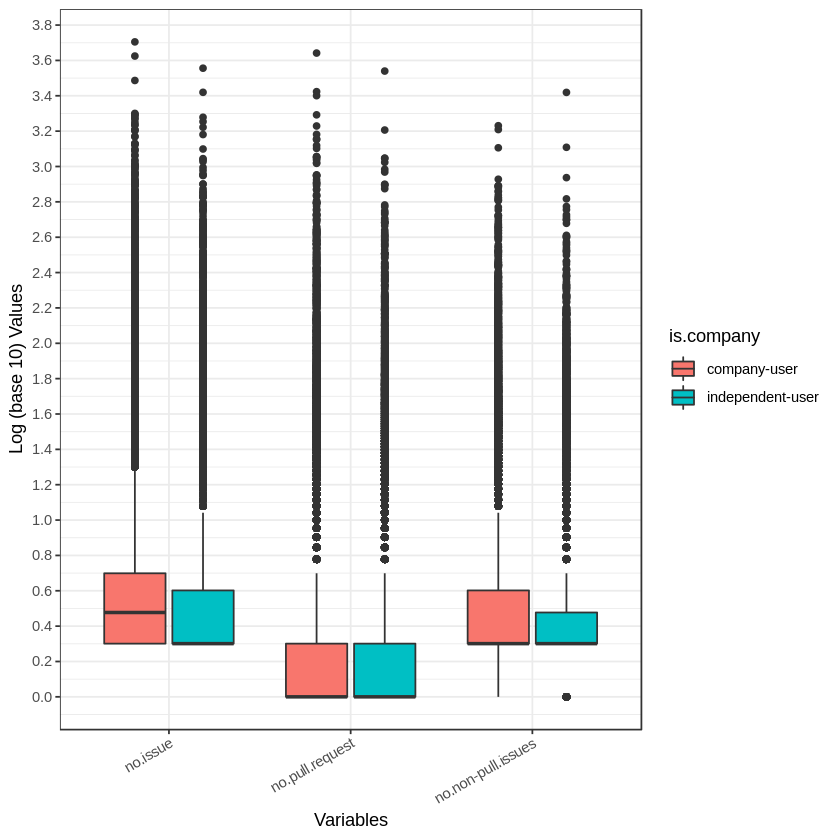

In [122]:
df.m = melt(p.df, id.var = 'is.company')

ggplot(df.m, aes(variable, value,fill=is.company)) + geom_boxplot()+   
labs(x='Variables', y = 'Log (base 10) Values') + 
  theme_bw() + theme(axis.text.x = element_text(angle = 30, hjust = 1)) +
  scale_y_continuous(breaks=pretty_breaks(n=20)) 

In [119]:
p.df = user.info.nb[,c(2, 11:18)]
str(p.df)
colnames(p.df) = c('is.company', 'no.issue.level.0', 'no.pull.request.level.0',
                  'no.issue.level.1', 'no.pull.request.level.1',
                  'no.issue.level.2+','no.pull.request.level.2+',
                  'no.issue.level.NONE', 'no.pull.request.level.NONE')
p.df$is.company = factor(ifelse(p.df$is.company == 0, 'independent-user', 'company-user'))
p.df[,2:9] <- log10(p.df[,2:9]+1)

Classes 'data.table' and 'data.frame':	272107 obs. of  9 variables:
 $ is_company           : int  0 0 0 0 1 0 1 0 1 1 ...
 $ n_issue_layer_0      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_pull_req_layer_0   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_issue_layer_1      : int  0 0 0 17 0 0 2 0 0 0 ...
 $ n_pull_req_layer_1   : int  0 0 0 17 0 0 2 0 0 0 ...
 $ n_issue_layer_more   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_pull_req_layer_more: int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_issue_layer_none   : int  1 2 5 0 1 1 0 2 2 1 ...
 $ n_pull_req_layer_none: int  0 2 5 0 0 0 0 0 0 0 ...
 - attr(*, ".internal.selfref")=<externalptr> 


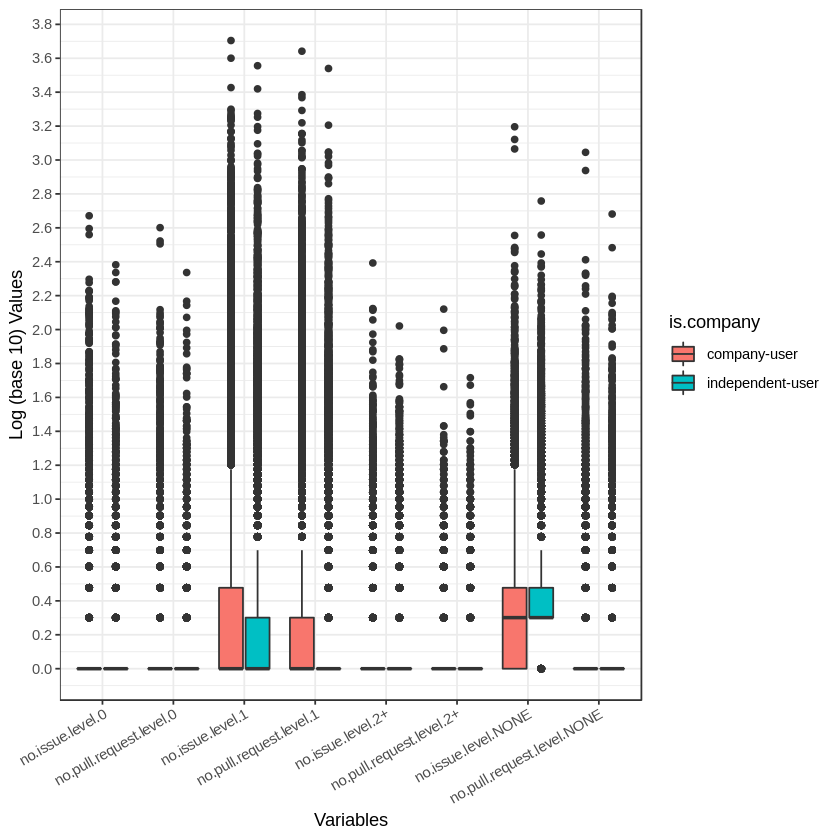

In [120]:
df.m = melt(p.df, id.var = 'is.company')
ggplot(df.m, aes(variable, value,fill=is.company)) + geom_boxplot()+   
labs(x='Variables', y = 'Log (base 10) Values') + 
  theme_bw() + theme(axis.text.x = element_text(angle = 30, hjust = 1)) +
  scale_y_continuous(breaks=pretty_breaks(n=20)) 

Classes 'data.table' and 'data.frame':	272107 obs. of  5 variables:
 $ is_company: int  0 0 0 0 1 0 1 0 1 1 ...
 $ n_pi_0    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_pi_1    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_pi_2    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_pi_n    : int  1 0 0 0 1 1 0 2 2 1 ...
 - attr(*, ".internal.selfref")=<externalptr> 


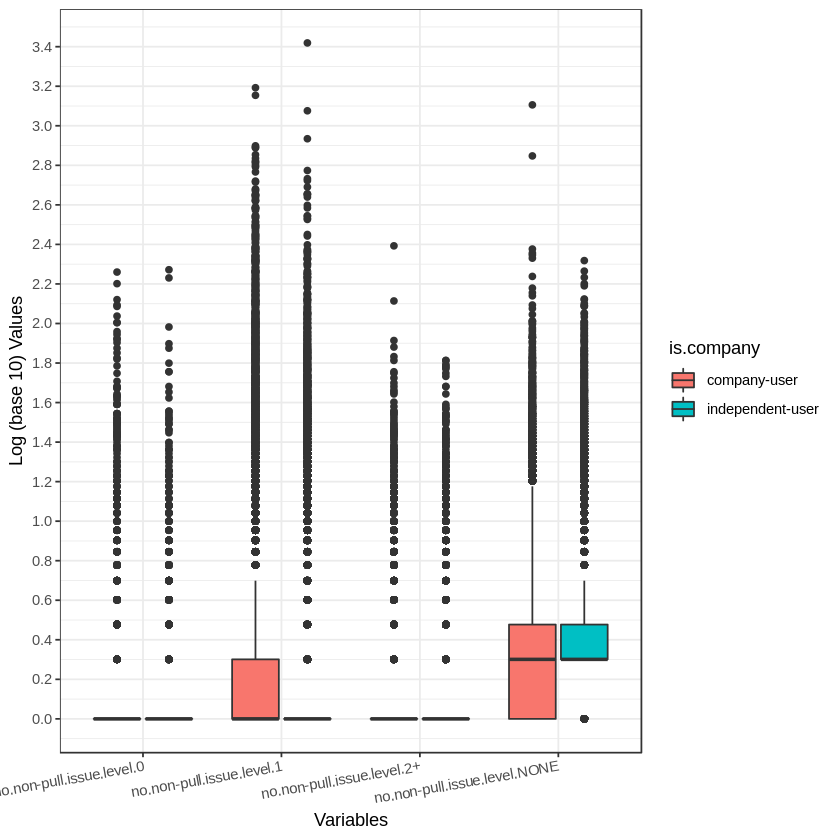

In [123]:
p.df = user.info.nb[,c(2, 22:25)]
str(p.df)
colnames(p.df) = c('is.company', 'no.non-pull.issue.level.0',
                  'no.non-pull.issue.level.1', 
                  'no.non-pull.issue.level.2+',
                  'no.non-pull.issue.level.NONE')
p.df$is.company = factor(ifelse(p.df$is.company == 0, 'independent-user', 'company-user'))
p.df[,2:5] <- log10(p.df[,2:5]+1)

df.m = melt(p.df, id.var = 'is.company')
ggplot(df.m, aes(variable, value,fill=is.company)) + geom_boxplot()+   
labs(x='Variables', y = 'Log (base 10) Values') + 
  theme_bw() + theme(axis.text.x = element_text(angle = 10, hjust = 1)) +
  scale_y_continuous(breaks=pretty_breaks(n=20)) 

In [85]:
str(user.info.nb)

Classes 'data.table' and 'data.frame':	272107 obs. of  25 variables:
 $ login                : chr  "alabadoster" "AlabasterAxe" "alabbas-ali" "alabid" ...
 $ is_company           : int  0 0 0 0 1 0 1 0 1 1 ...
 $ is_bot               : int  0 0 0 0 0 0 0 0 0 0 ...
 $ no_project           : int  4 0 0 79 13 31 10 1 4 4 ...
 $ no_forked_project    : int  0 0 0 29 0 1 5 1 2 0 ...
 $ n_pkg_committed      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_direct_deps        : int  0 0 0 65 258 195 3 0 0 0 ...
 $ n_recursive_deps     : int  0 0 0 1358 1321 1373 119 0 0 0 ...
 $ n_issue              : int  1 2 5 17 1 1 2 2 2 1 ...
 $ n_pull_req           : int  0 2 5 17 0 0 2 0 0 0 ...
 $ n_issue_layer_0      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_pull_req_layer_0   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_issue_layer_1      : int  0 0 0 17 0 0 2 0 0 0 ...
 $ n_pull_req_layer_1   : int  0 0 0 17 0 0 2 0 0 0 ...
 $ n_issue_layer_more   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_pull_req_layer_more: int  0 0 0 0 0 0 0 0 0 

In [7]:
#ss = ui[ui$n_issue_layer_none >0, ]
#ss = ui[ui$n_issue >0, ]
#ss = uid
ss = user.info
#ss = user.info[user.info$n_pull_req >0 & user.info$n_issue >= 10, ]
#ss = user.info[user.info$n_issue >= 10, ]


l0 = (ss$n_issue_layer_0)/(ss$n_issue)
l1 = (ss$n_issue_layer_1)/(ss$n_issue)
l2 = (ss$n_issue_layer_more)/(ss$n_issue)
l = (ss$n_issue_layer_none)/(ss$n_issue)

p0 = (ss$n_pull_req_layer_0)/(ss$n_pull_req)
p1 = (ss$n_pull_req_layer_1)/(ss$n_pull_req)
p2 = (ss$n_pull_req_layer_more)/(ss$n_pull_req)
px = (ss$n_pull_req_layer_none)/(ss$n_pull_req)


df = data.frame(l0 = l0, l1 = l1, l2 = l2, lx = l)
#df= data.frame(p0 = p0, p1 = p1, p2 = p2, px = px)
#df[is.na(df)] = 0

In [8]:
summary(df)
nrow(df)

       l0                l1               l2                lx        
 Min.   :0.00000   Min.   :0.0000   Min.   :0.00000   Min.   :0.0000  
 1st Qu.:0.00000   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.2500  
 Median :0.00000   Median :0.0000   Median :0.00000   Median :1.0000  
 Mean   :0.00707   Mean   :0.2584   Mean   :0.03376   Mean   :0.7008  
 3rd Qu.:0.00000   3rd Qu.:0.5000   3rd Qu.:0.00000   3rd Qu.:1.0000  
 Max.   :1.00000   Max.   :1.0000   Max.   :1.00000   Max.   :1.0000  

[1] 272142

In [31]:
pclusters  <-  kmeans(scale(df), 3, nstart=100, iter.max=100)  



In [358]:
pclusters$centers  	
pclusters$size  	
groups  <-  pclusters$cluster  	

,l0,l1,l2,lx
1,0.001355698,0.01403187,0.009559892,0.9750525
2,0.019534409,0.79140754,0.086532983,0.1025251


[1] 186591  85551

In [6]:
library(cluster) # run install.packages("cluster") if necessary


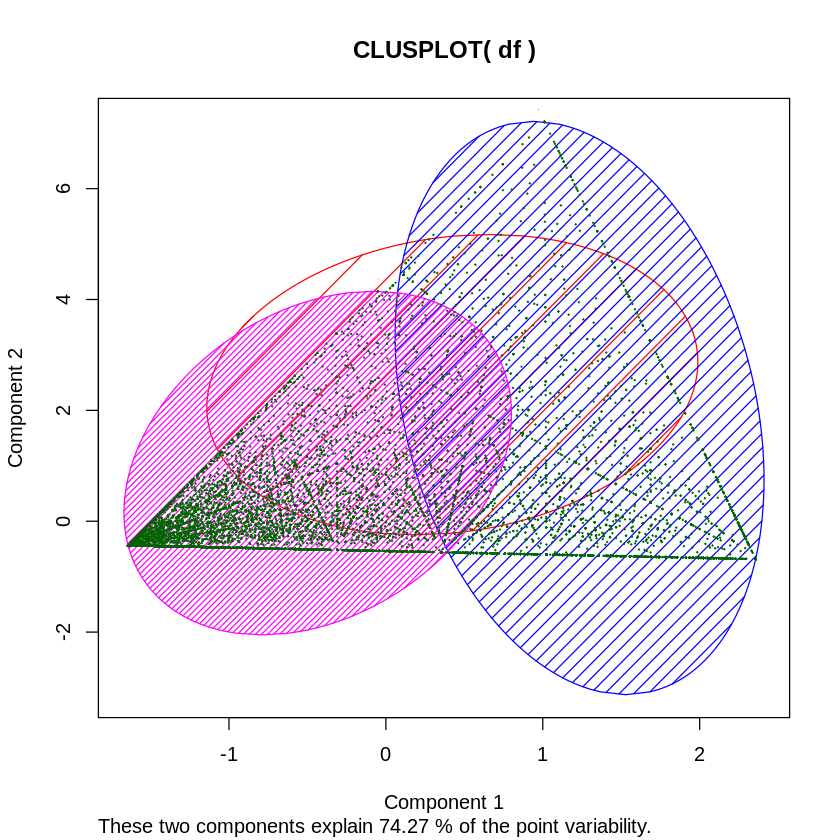

In [32]:
clusplot(df, pclusters$cluster, color=TRUE, shade=TRUE,
labels=4, lines=0, cex = 0.1)

In [9]:
library(e1071)
scaled.df = scale(df)
pcenter <- attr(scaled.df, "scaled:center") 
pscale <- attr(scaled.df, "scaled:scale")
fit <- cmeans(scaled.df,3,50,verbose=TRUE,method="cmeans",m=3)


Iteration:   1, Error:  0.4744368955
Iteration:   2, Error:  0.3617662187
Iteration:   3, Error:  0.2856858398
Iteration:   4, Error:  0.2574318674
Iteration:   5, Error:  0.2494690021
Iteration:   6, Error:  0.2451900843
Iteration:   7, Error:  0.2408295403
Iteration:   8, Error:  0.2362227278
Iteration:   9, Error:  0.2317352341
Iteration:  10, Error:  0.2279346948
Iteration:  11, Error:  0.2249222748
Iteration:  12, Error:  0.2223582018
Iteration:  13, Error:  0.2201212251
Iteration:  14, Error:  0.2181887851
Iteration:  15, Error:  0.2165996479
Iteration:  16, Error:  0.2154365137
Iteration:  17, Error:  0.2147204486
Iteration:  18, Error:  0.2143569866
Iteration:  19, Error:  0.2142020000
Iteration:  20, Error:  0.2141442165
Iteration:  21, Error:  0.2141245582
Iteration:  22, Error:  0.2141182421
Iteration:  23, Error:  0.2141162801
Iteration:  24, Error:  0.2141156823
Iteration:  25, Error:  0.2141155021
Iteration:  26, Error:  0.2141154481
Iteration:  27, Error:  0.2141154319
I

In [10]:
pscale*fit$centers[1,]+pcenter
pscale*fit$centers[2,]+pcenter
pscale*fit$centers[3,]+pcenter


l0          l1          l2          lx 
0.002166635 0.951840955 0.005820034 0.040172376

l0         l1         l2         lx 
0.01371504 0.02843874 0.92087025 0.03697597

l0           l1           l2           lx 
0.0004735566 0.0067477248 0.0011073715 0.9916713471

In [11]:
fit$size

[1]  78047   8520 185575

In [24]:
fit$cluster

[1] 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 2 2 1 2
   [37] 1 1 1 2 1 1 1 1 2 2 1 2 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1
   [73] 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
  [109] 2 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1
  [145] 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1
  [181] 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 2 2 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1
  [217] 1 1 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 2 1 1 2 1 1 1 2 1 2 1
  [253] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 2 1 1 1 1 1 1 1 1 2 1 1 2 2 2 1 1 1 1
  [289] 1 1 2 1 1 1 1 1 1 2 1 1 2 1 2 1 1 2 1 1 2 1 1 2 1 1 1 2 2 2 1 1 2 2 1 1
  [325] 1 1 2 1 2 2 2 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 2 1
  [361] 1 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2
  [397] 1 1 1 2 2 1 2 1 1 2 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
  [433] 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 1 1
  [469] 1 1 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 2 2 2 2 1 1 1 1 1
  [505] 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [541] 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 1 1 1 1 1 2
  [577] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1
  [613] 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 2 1 1 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1
  [649] 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
  [685] 1 1 1 1 1 2 1 2 2 1 1 2 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
  [721] 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
  [757] 1 1 2 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 2 1
  [793] 1 2 1 1 1 1 2 2 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 1 2 1 2
  [829] 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 2 1
  [865] 2 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 1
  [901] 1 1 1 2 1 2 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1
  [937] 1 1 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 2 1 2 2 1
  [973] 1 1 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 [1009] 2 2 1 2 1 1 1 1 2 1 1 2 1 2 1 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2 1 1 1
 [1045] 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 [1081] 1 1 1 2 1 2 1 1 2 2 1 2 1 2 1 2 2 1 2 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1
 [1117] 1 1 2 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1
 [1153] 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1
 [1189] 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 [1225] 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1
 [1261] 1 2 1 1 1 1 1 1 2 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 1
 [1297] 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1 1
 [1333] 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 2 1 2 1 2 1
 [1369] 1 1 2 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2
 [1405] 2 1 1 1 1 1 1 2 1 1 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2
 [1441] 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 2 2 1 1
 [1477] 1 2 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 1 2
 [1513] 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 [1549] 2 2 1 1 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1585] 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 2 1 1 2 1 1 2 1 1 2 2 1 1 1 1 1 1
 [1621] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 [1657] 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1693] 1 1 2 1 1 1 2 2 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 2 1
 [1729] 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 2 1 1 2 1 2 2 2 1 2 1 2 1 1 1 1 1 1 2
 [1765] 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2
 [18

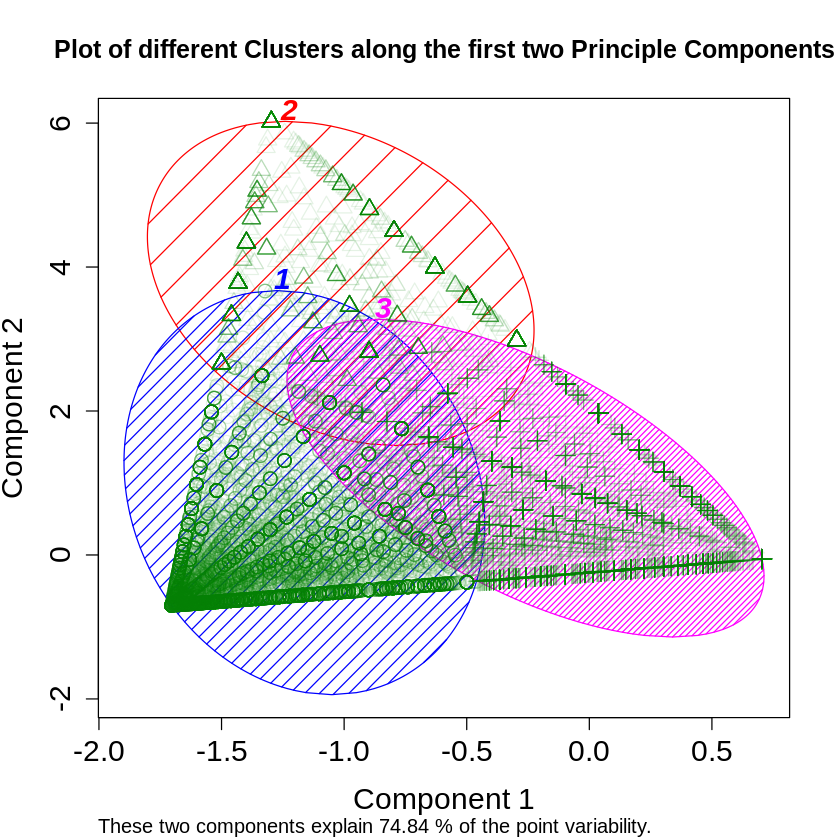

In [25]:
clusplot(df, fit$cluster, color=TRUE, shade=TRUE, stand = T, plotchar = T,
labels=4, lines=0, cex = 1.5, cex.lab = 1.5, cex.axis = 1.5, cex.main = 1.25, col.p=rgb(0,0.5,0,alpha=0.1),
         main = 'Plot of different Clusters along the first two Principle Components')


In [12]:
library(factoextra)
library(cluster)
library(fpc)
library(NbClust)



Loading required package: ggplot2
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


In [ ]:
dd <- dist(scaled.df, method ="manhattan")

In [ ]:
sil <- silhouette(fit$cluster, dist(scale(df)))
summary(sil)

In [ ]:
pdf('my_nice_plot.pdf', height = 8, width = 8)
plot(sil, main='Silhouette Plot' )
abline(v = 0.56, lty = 2, lwd = 0.5)
dev.off()


In [187]:
prk <- pam(df, 3)

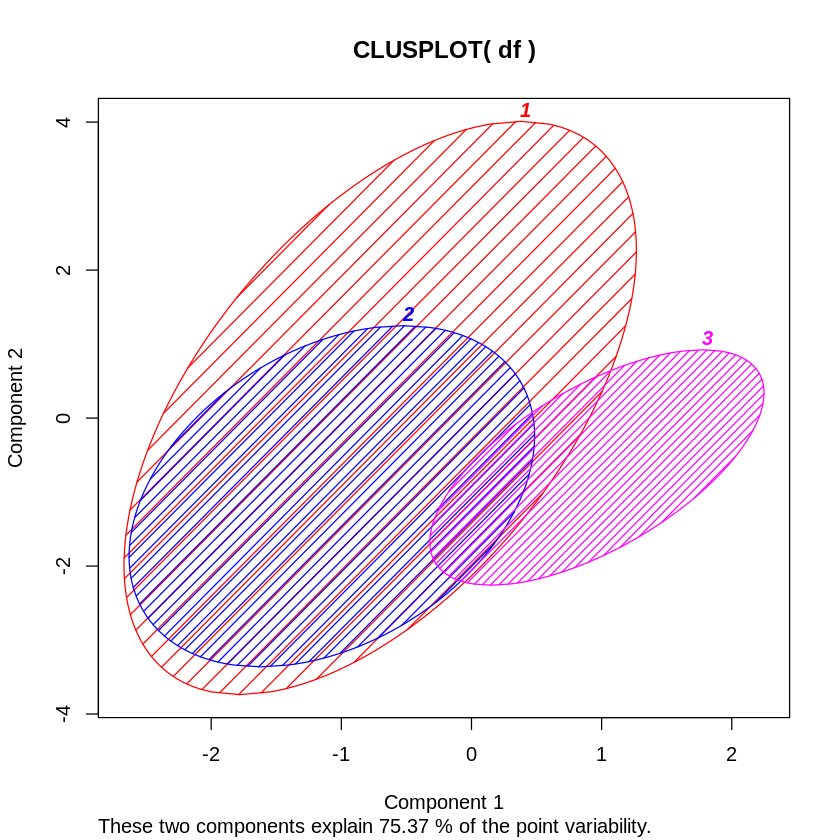

In [271]:
clusplot(df, prk$cluster, color=TRUE, shade=TRUE,
labels=4, lines=0, cex = 0)

In [58]:
library(fpc)

# DBScan is a classic algorithm for density-based clustering
ds.result <- dbscan(scale(df), eps = 0.42, MinPts = 5)


ERROR: Error: cannot allocate vector of size 310.8 Gb


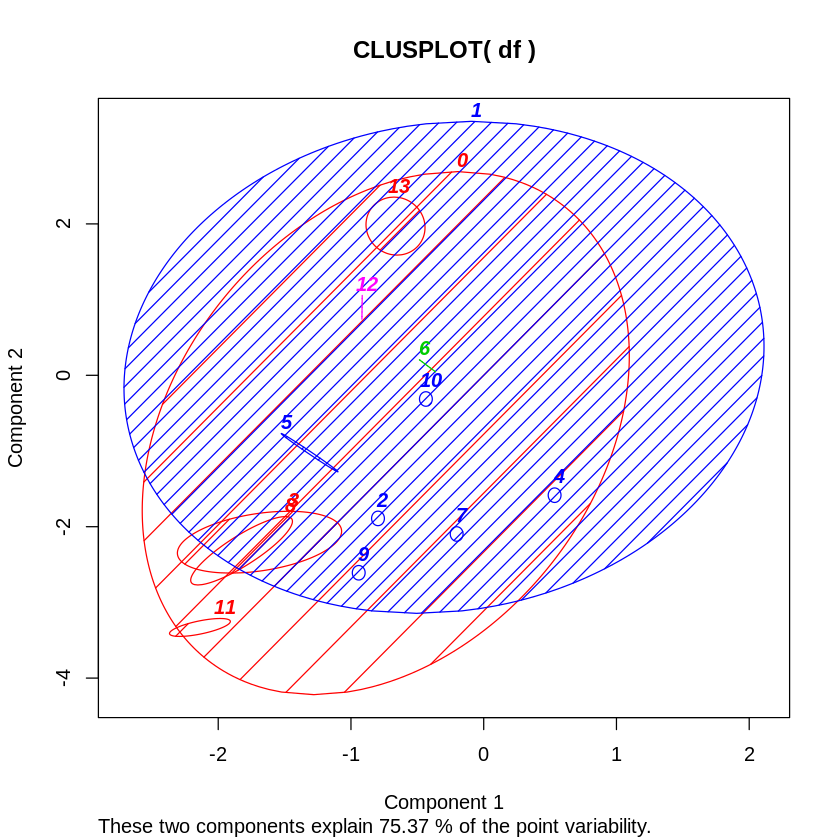

In [214]:
clusplot(df, ds.result$cluster, color=TRUE, shade=TRUE,
labels=4, lines=0, cex = 0)

In [201]:
library(Rtsne)
set.seed(9)  
tsne_model_1 = Rtsne(as.matrix(df), check_duplicates=FALSE, pca=TRUE, perplexity=100, theta=0.5, dims=2)

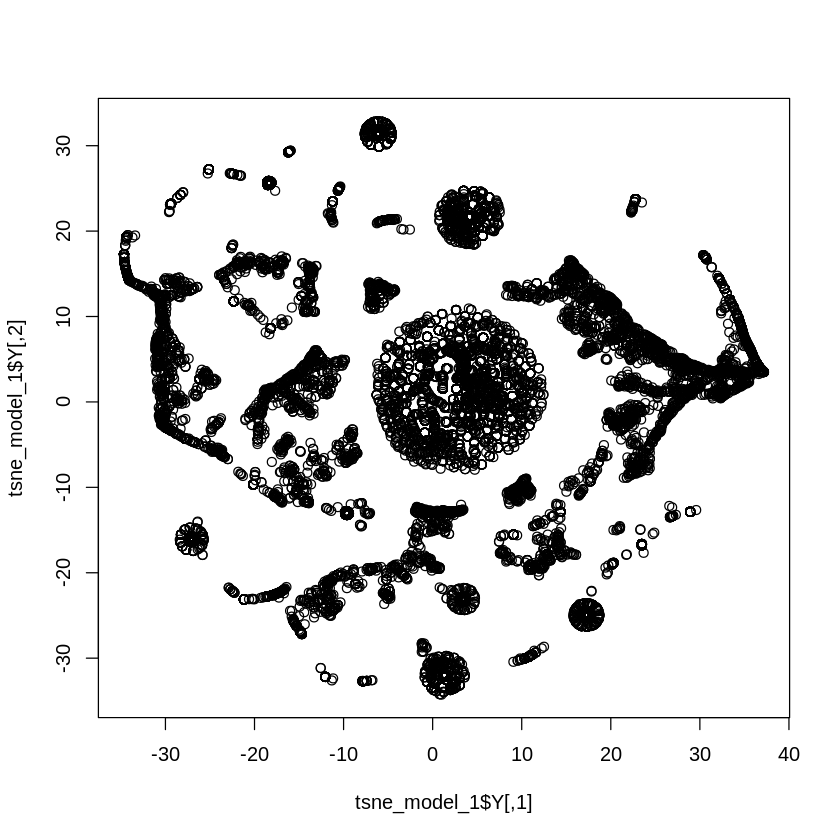

In [272]:
plot(tsne_model_1$Y)

In [194]:
library(dplyr)
d_tsne_1 = as.data.frame(tsne_model_1$Y)  

## keeping original data
d_tsne_1_original=d_tsne_1

## Creating k-means clustering model, and assigning the result to the data used to create the tsne
fit_cluster_kmeans=kmeans(scale(d_tsne_1), 3)  
d_tsne_1_original$cl_kmeans = factor(fit_cluster_kmeans$cluster)




Attaching package: 'dplyr'

The following object is masked from 'package:randomForest':

    combine

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [195]:
plot_cluster=function(data, var_cluster, palette)  
{
  ggplot(data, aes_string(x="V1", y="V2", color=var_cluster)) +
  geom_point(size=0.25) +
  guides(colour=guide_legend(override.aes=list(size=6))) +
  xlab("") + ylab("") +
  ggtitle("") +
  theme_light(base_size=20) +
  theme(axis.text.x=element_blank(),
        axis.text.y=element_blank(),
        legend.direction = "horizontal", 
        legend.position = "bottom",
        legend.box = "horizontal") + 
    scale_colour_brewer(palette = palette) 
}

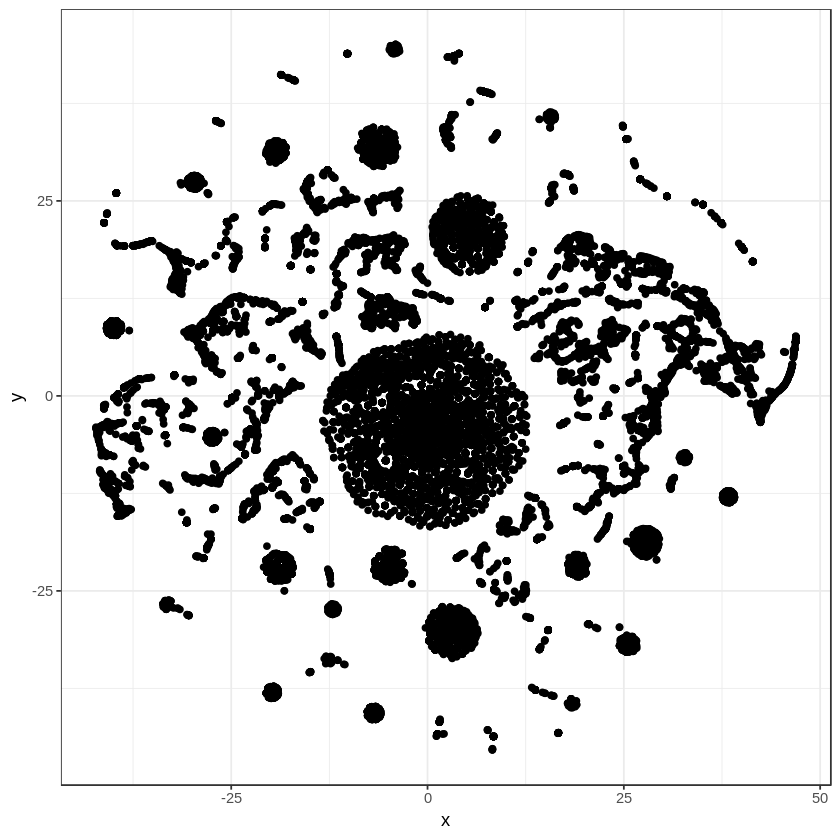

In [223]:
library(ggplot2)
tsne_plot <- data.frame(x = d_tsne_1[,1], y = d_tsne_1[,2])
ggplot(tsne_plot) + geom_point(aes(x=x, y=y)) + theme_bw()

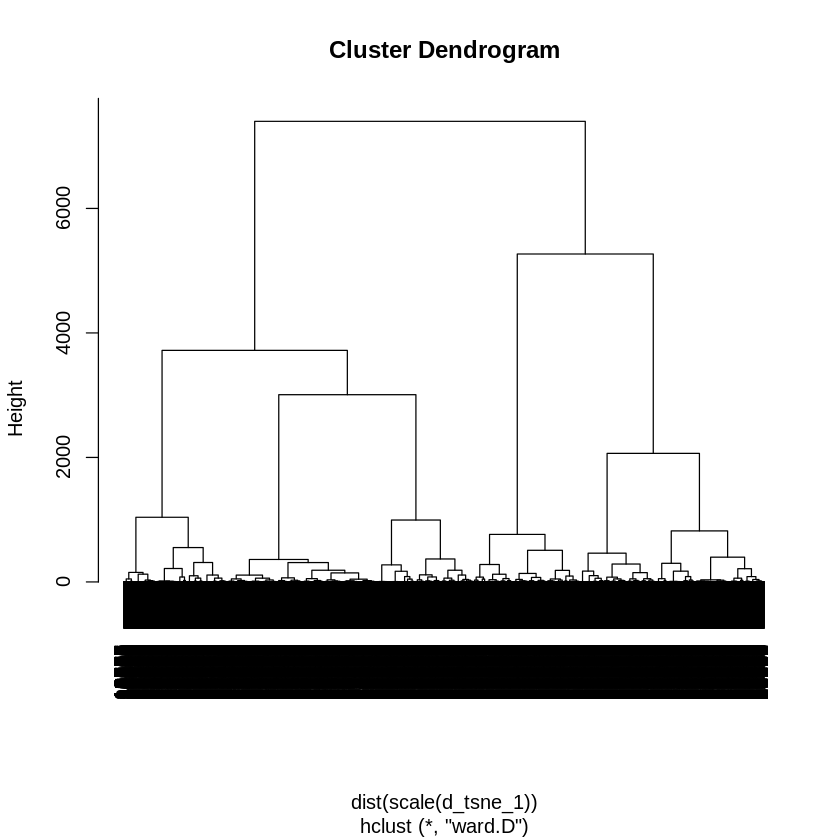

In [203]:
fc.h=hclust(dist(scale(d_tsne_1)), method = 'ward.D')
plot(fc.h)

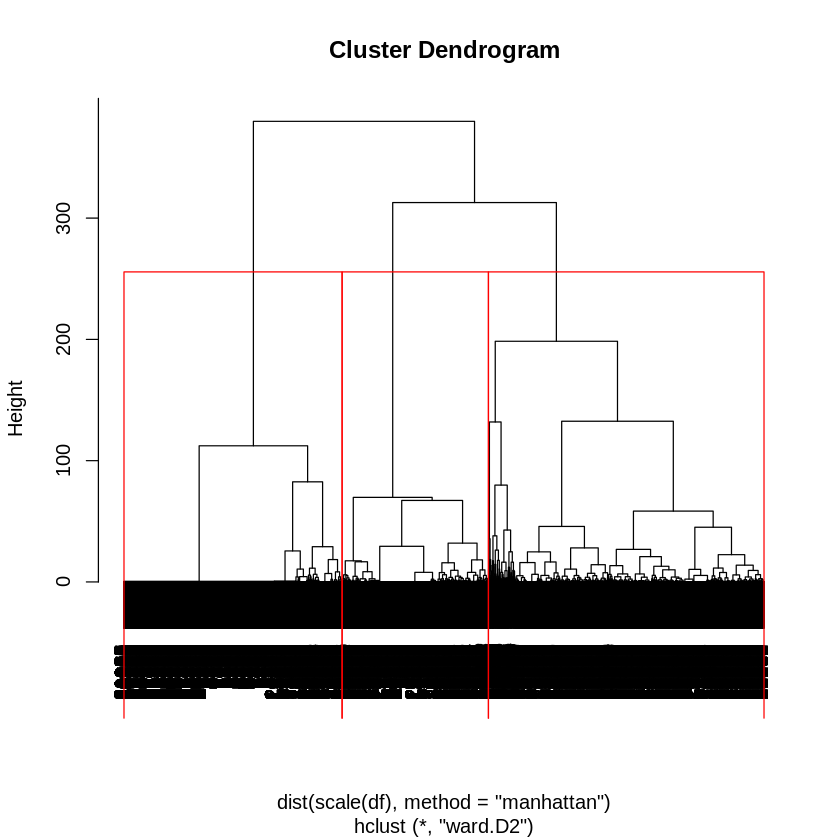

In [316]:
fc.h2=hclust(dist(scale(df), method='manhattan'), method = 'ward.D2')
plot(fc.h2)
rect.hclust(fc.h2, k=3)  # put boxes on them


In [317]:
clusters = cutree(fc.h2, k=3) # get 5 clusters

# function to find medoid in cluster i
clust.centroid = function(i, dat, clusters) {
    ind = (clusters == i)
    colMeans(dat[ind,])
}

sapply(unique(clusters), clust.centroid, df, clusters)


l0,0.0233024,0.0001452452,1.895331e-05
l1,0.6386914,0.0936140912,7.724098e-02
l2,0.1600549,0.2878648976,8.795579e-01
lx,0.1779513,0.6183757660,4.318213e-02


In [320]:
sil <- silhouette(cutree(fc.h2, k = 3) , dist(scale(df)))
summary(sil)

Silhouette of 21144 units in 3 clusters from silhouette.default(x = cutree(fc.h2, k = 3), dist = dist(scale(df))) :
 Cluster sizes and average silhouette widths:
     9104      4834      7206 
0.3636649 0.6187185 0.6328911 
Individual silhouette widths:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.5129  0.4010  0.5778  0.5137  0.7415  0.8386 

In [321]:
pdf('my_nice_plot2.pdf', height = 8, width = 8)
plot(sil, main='Silhouette Plot' )
abline(v = 0.56, lty = 2, lwd = 0.5)
dev.off()

png 
  2

In [154]:
uf = user.info.nb[user.info.nb$n_issue >10, ]
nrow(uf)

[1] 17149

In [155]:
summary(uf)

    login             is_company         is_bot    no_project      
 Length:17149       Min.   :0.0000   Min.   :0   Min.   :    0.00  
 Class :character   1st Qu.:0.0000   1st Qu.:0   1st Qu.:   17.00  
 Mode  :character   Median :0.0000   Median :0   Median :   44.00  
                    Mean   :0.4944   Mean   :0   Mean   :   78.61  
                    3rd Qu.:1.0000   3rd Qu.:0   3rd Qu.:   95.00  
                    Max.   :1.0000   Max.   :0   Max.   :11591.00  
 no_forked_project n_pkg_committed    n_direct_deps     n_recursive_deps
 Min.   :   0.00   Min.   :  0.0000   Min.   :    0.0   Min.   :   0    
 1st Qu.:   6.00   1st Qu.:  0.0000   1st Qu.:   21.0   1st Qu.: 493    
 Median :  17.00   Median :  0.0000   Median :  298.0   Median :1491    
 Mean   :  34.66   Mean   :  0.4974   Mean   :  597.4   Mean   :1299    
 3rd Qu.:  40.00   3rd Qu.:  0.0000   3rd Qu.: 1051.0   3rd Qu.:1780    
 Max.   :5142.00   Max.   :236.0000   Max.   :38942.0   Max.   :9724    
    n_issue  

In [156]:
uc = uf[uf$is_company ==1, ]
ui = uf[uf$is_company ==0,]

In [211]:
s0 = uf[uf$n_issue_layer_0 >0, ]
s1 = uf[uf$n_issue_layer_1 >0, ]
s2 = uf[uf$n_issue_layer_more >0, ]
s3 = uf[uf$n_issue_layer_none >0, ]
nrow(s0)
nrow(s1)
nrow(s2)
nrow(s3)
length(Reduce(intersect, list(s0$login, s1$login, s2$login, s3$login)))

[1] 2106

[1] 14572

[1] 6968

[1] 14690

[1] 1102

Classes 'data.table' and 'data.frame':	17149 obs. of  4 variables:
 $ is_company      : int  0 0 0 0 1 1 1 0 0 0 ...
 $ n_issue         : int  17 11 11 15 24 25 97 63 13 11 ...
 $ n_pull_req      : int  17 0 2 10 16 13 48 16 5 8 ...
 $ n.non_pull_issue: int  0 11 9 5 8 12 49 47 8 3 ...
 - attr(*, ".internal.selfref")=<externalptr> 


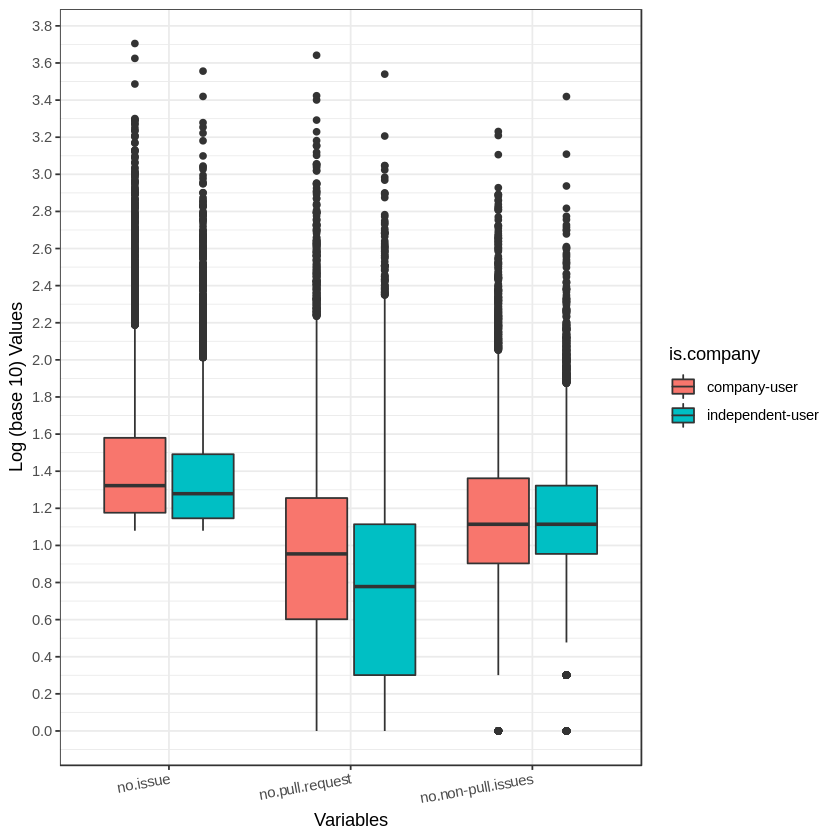

In [160]:
p.df = uf[,c(2, 9, 10, 21)]
str(p.df)
colnames(p.df) = c('is.company', 'no.issue', 'no.pull.request', 'no.non-pull.issues')
p.df$is.company = factor(ifelse(p.df$is.company == 0, 'independent-user', 'company-user'))

p.df[,2:4] <- log10(p.df[,2:4]+1)
df.m = melt(p.df, id.var = 'is.company')

ggplot(df.m, aes(variable, value,fill=is.company)) + geom_boxplot()+   
labs(x='Variables', y = 'Log (base 10) Values') + 
  theme_bw() + theme(axis.text.x = element_text(angle = 10, hjust = 1)) +
  scale_y_continuous(breaks=pretty_breaks(n=20)) 

Classes 'data.table' and 'data.frame':	17149 obs. of  9 variables:
 $ is_company           : int  0 0 0 0 1 1 1 0 0 0 ...
 $ n_issue_layer_0      : int  0 0 0 0 1 2 28 3 0 0 ...
 $ n_pull_req_layer_0   : int  0 0 0 0 1 2 18 2 0 0 ...
 $ n_issue_layer_1      : int  17 0 7 11 17 20 65 23 4 11 ...
 $ n_pull_req_layer_1   : int  17 0 2 10 12 10 29 3 0 8 ...
 $ n_issue_layer_more   : int  0 0 2 0 4 1 3 5 3 0 ...
 $ n_pull_req_layer_more: int  0 0 0 0 2 0 0 0 2 0 ...
 $ n_issue_layer_none   : int  0 11 2 4 2 2 1 32 6 0 ...
 $ n_pull_req_layer_none: int  0 0 0 0 1 1 1 11 3 0 ...
 - attr(*, ".internal.selfref")=<externalptr> 


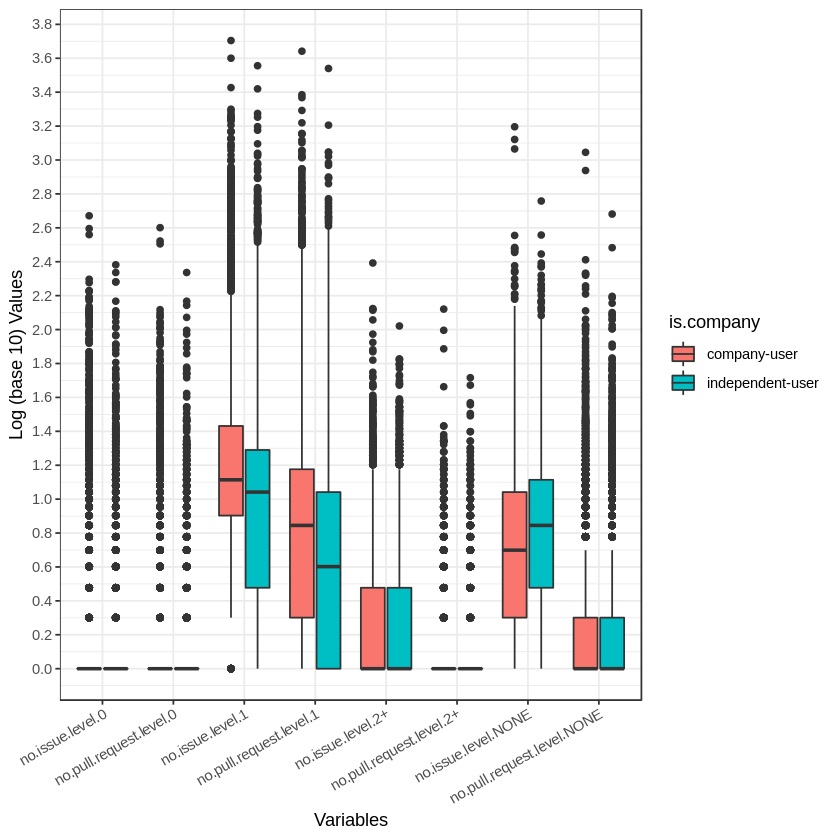

In [158]:
p.df = uf[,c(2, 11:18)]
str(p.df)
colnames(p.df) = c('is.company', 'no.issue.level.0', 'no.pull.request.level.0',
                  'no.issue.level.1', 'no.pull.request.level.1',
                  'no.issue.level.2+','no.pull.request.level.2+',
                  'no.issue.level.NONE', 'no.pull.request.level.NONE')
p.df$is.company = factor(ifelse(p.df$is.company == 0, 'independent-user', 'company-user'))
p.df[,2:9] <- log10(p.df[,2:9]+1)
df.m = melt(p.df, id.var = 'is.company')
ggplot(df.m, aes(variable, value,fill=is.company)) + geom_boxplot()+   
labs(x='Variables', y = 'Log (base 10) Values') + 
  theme_bw() + theme(axis.text.x = element_text(angle = 30, hjust = 1)) +
  scale_y_continuous(breaks=pretty_breaks(n=20)) 

Classes 'data.table' and 'data.frame':	17149 obs. of  5 variables:
 $ is_company: int  0 0 0 0 1 1 1 0 0 0 ...
 $ n_pi_0    : int  0 0 0 0 0 0 10 1 0 0 ...
 $ n_pi_1    : int  0 0 5 1 5 10 36 20 4 3 ...
 $ n_pi_2    : int  0 0 2 0 2 1 3 5 1 0 ...
 $ n_pi_n    : int  0 11 2 4 1 1 0 21 3 0 ...
 - attr(*, ".internal.selfref")=<externalptr> 


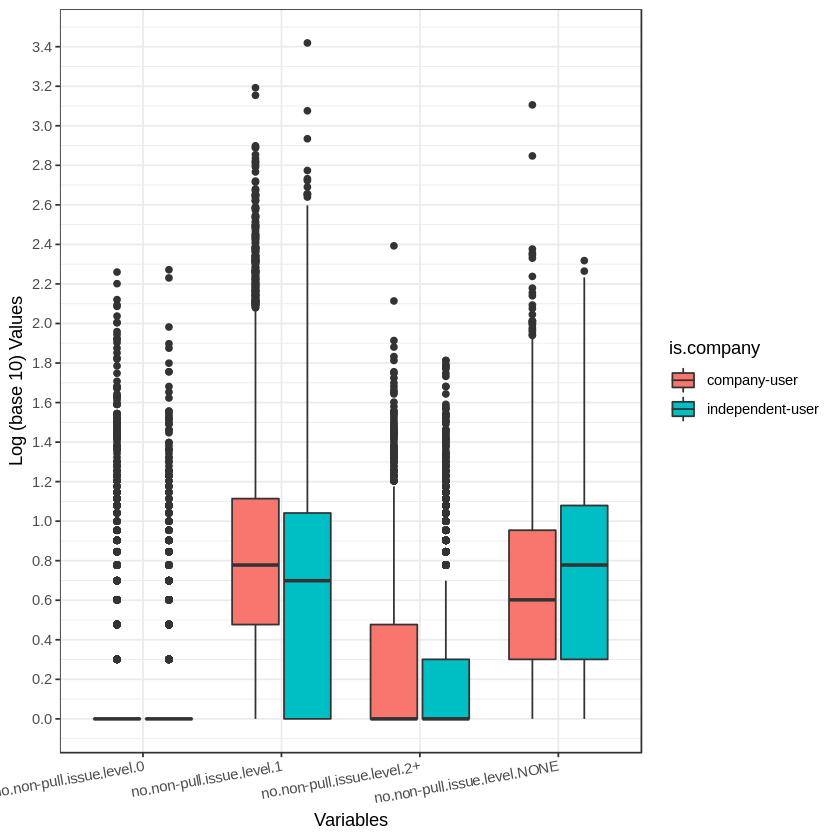

In [159]:
p.df = uf[,c(2, 22:25)]
str(p.df)
colnames(p.df) = c('is.company', 'no.non-pull.issue.level.0',
                  'no.non-pull.issue.level.1', 
                  'no.non-pull.issue.level.2+',
                  'no.non-pull.issue.level.NONE')
p.df$is.company = factor(ifelse(p.df$is.company == 0, 'independent-user', 'company-user'))
p.df[,2:5] <- log10(p.df[,2:5]+1)

df.m = melt(p.df, id.var = 'is.company')
ggplot(df.m, aes(variable, value,fill=is.company)) + geom_boxplot()+   
labs(x='Variables', y = 'Log (base 10) Values') + 
  theme_bw() + theme(axis.text.x = element_text(angle = 10, hjust = 1)) +
  scale_y_continuous(breaks=pretty_breaks(n=20)) 

In [162]:
ks.test(uc$n_issue, ui$n_issue, alternative = "less")
wilcox.test(uc$n_issue, ui$n_issue, alternative = "two.sided")
ks.test(uc$n_pull_req, ui$n_pull_req, alternative = "less")
wilcox.test(uc$n_pull_req, ui$n_pull_req, alternative = "two.sided")
ks.test(uc$n.non_pull_issue, ui$n.non_pull_issue, alternative = "two.sided")
wilcox.test(uc$n.non_pull_issue, ui$n.non_pull_issue, alternative = "two.sided")

Warning message in ks.test(uc$n_issue, ui$n_issue, alternative = "less"):
"p-value will be approximate in the presence of ties"


	Two-sample Kolmogorov-Smirnov test

data:  uc$n_issue and ui$n_issue
D^- = 0.083531, p-value < 2.2e-16
alternative hypothesis: the CDF of x lies below that of y



	Wilcoxon rank sum test with continuity correction

data:  uc$n_issue and ui$n_issue
W = 40621000, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


Warning message in ks.test(uc$n_pull_req, ui$n_pull_req, alternative = "less"):
"p-value will be approximate in the presence of ties"


	Two-sample Kolmogorov-Smirnov test

data:  uc$n_pull_req and ui$n_pull_req
D^- = 0.13927, p-value < 2.2e-16
alternative hypothesis: the CDF of x lies below that of y



	Wilcoxon rank sum test with continuity correction

data:  uc$n_pull_req and ui$n_pull_req
W = 43556000, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


Warning message in ks.test(uc$n.non_pull_issue, ui$n.non_pull_issue, alternative = "two.sided"):
"p-value will be approximate in the presence of ties"


	Two-sample Kolmogorov-Smirnov test

data:  uc$n.non_pull_issue and ui$n.non_pull_issue
D = 0.033775, p-value = 0.0001131
alternative hypothesis: two-sided



	Wilcoxon rank sum test with continuity correction

data:  uc$n.non_pull_issue and ui$n.non_pull_issue
W = 36930000, p-value = 0.5918
alternative hypothesis: true location shift is not equal to 0


In [212]:
str(user.info.nb)

Classes 'data.table' and 'data.frame':	272107 obs. of  25 variables:
 $ login                : chr  "alabadoster" "AlabasterAxe" "alabbas-ali" "alabid" ...
 $ is_company           : int  0 0 0 0 1 0 1 0 1 1 ...
 $ is_bot               : int  0 0 0 0 0 0 0 0 0 0 ...
 $ no_project           : int  4 0 0 79 13 31 10 1 4 4 ...
 $ no_forked_project    : int  0 0 0 29 0 1 5 1 2 0 ...
 $ n_pkg_committed      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_direct_deps        : int  0 0 0 65 258 195 3 0 0 0 ...
 $ n_recursive_deps     : int  0 0 0 1358 1321 1373 119 0 0 0 ...
 $ n_issue              : int  1 2 5 17 1 1 2 2 2 1 ...
 $ n_pull_req           : int  0 2 5 17 0 0 2 0 0 0 ...
 $ n_issue_layer_0      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_pull_req_layer_0   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_issue_layer_1      : int  0 0 0 17 0 0 2 0 0 0 ...
 $ n_pull_req_layer_1   : int  0 0 0 17 0 0 2 0 0 0 ...
 $ n_issue_layer_more   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_pull_req_layer_more: int  0 0 0 0 0 0 0 0 0 

In [252]:
ut = user.info.nb[ ,2:25]
ut$is_bot = NULL
str(ut)
ut$is_company = factor(ut$is_company)

Classes 'data.table' and 'data.frame':	272107 obs. of  23 variables:
 $ is_company           : int  0 0 0 0 1 0 1 0 1 1 ...
 $ no_project           : int  4 0 0 79 13 31 10 1 4 4 ...
 $ no_forked_project    : int  0 0 0 29 0 1 5 1 2 0 ...
 $ n_pkg_committed      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_direct_deps        : int  0 0 0 65 258 195 3 0 0 0 ...
 $ n_recursive_deps     : int  0 0 0 1358 1321 1373 119 0 0 0 ...
 $ n_issue              : int  1 2 5 17 1 1 2 2 2 1 ...
 $ n_pull_req           : int  0 2 5 17 0 0 2 0 0 0 ...
 $ n_issue_layer_0      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_pull_req_layer_0   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_issue_layer_1      : int  0 0 0 17 0 0 2 0 0 0 ...
 $ n_pull_req_layer_1   : int  0 0 0 17 0 0 2 0 0 0 ...
 $ n_issue_layer_more   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_pull_req_layer_more: int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_issue_layer_none   : int  1 2 5 0 1 1 0 2 2 1 ...
 $ n_pull_req_layer_none: int  0 2 5 0 0 0 0 0 0 0 ...
 $ n_pkg_issue          : 

In [235]:
m = glm(is_company~n_issue_layer_0+n_issue_layer_1+n_issue_layer_more+n_issue_layer_none, data=ut, family='binomial')
summary(m)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = is_company ~ n_issue_layer_0 + n_issue_layer_1 + 
    n_issue_layer_more + n_issue_layer_none, family = "binomial", 
    data = ut)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-7.0842  -0.8517  -0.8503   1.5262   1.5445  

Coefficients:
                     Estimate Std. Error  z value Pr(>|z|)    
(Intercept)        -0.8351580  0.0045358 -184.124  < 2e-16 ***
n_issue_layer_0     0.0123130  0.0026988    4.562 5.06e-06 ***
n_issue_layer_1     0.0072082  0.0003907   18.451  < 2e-16 ***
n_issue_layer_more  0.0930684  0.0045928   20.264  < 2e-16 ***
n_issue_layer_none  0.0039011  0.0009147    4.265 2.00e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 337655  on 272106  degrees of freedom
Residual deviance: 335906  on 272102  degrees of freedom
AIC: 335916

Number of Fisher Scoring iterations: 5


In [236]:
library(car)
vif(m)

n_issue_layer_0    n_issue_layer_1 n_issue_layer_more n_issue_layer_none 
          1.039854           1.098708           1.080685           1.037352

In [237]:
drop1(m)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

,Df,Deviance,AIC
<none>,NA,335906.4,335916.4
n_issue_layer_0,1,335933.4,335941.4
n_issue_layer_1,1,336469.5,336477.5
n_issue_layer_more,1,336397.9,336405.9
n_issue_layer_none,1,335930.0,335938.0


In [238]:
anova(m)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

,Df,Deviance,Resid. Df,Resid. Dev
NULL,NA,NA,272106,337655.5
n_issue_layer_0,1,247.2411,272105,337408.2
n_issue_layer_1,1,940.3905,272104,336467.8
n_issue_layer_more,1,537.8154,272103,335930.0
n_issue_layer_none,1,23.6393,272102,335906.4


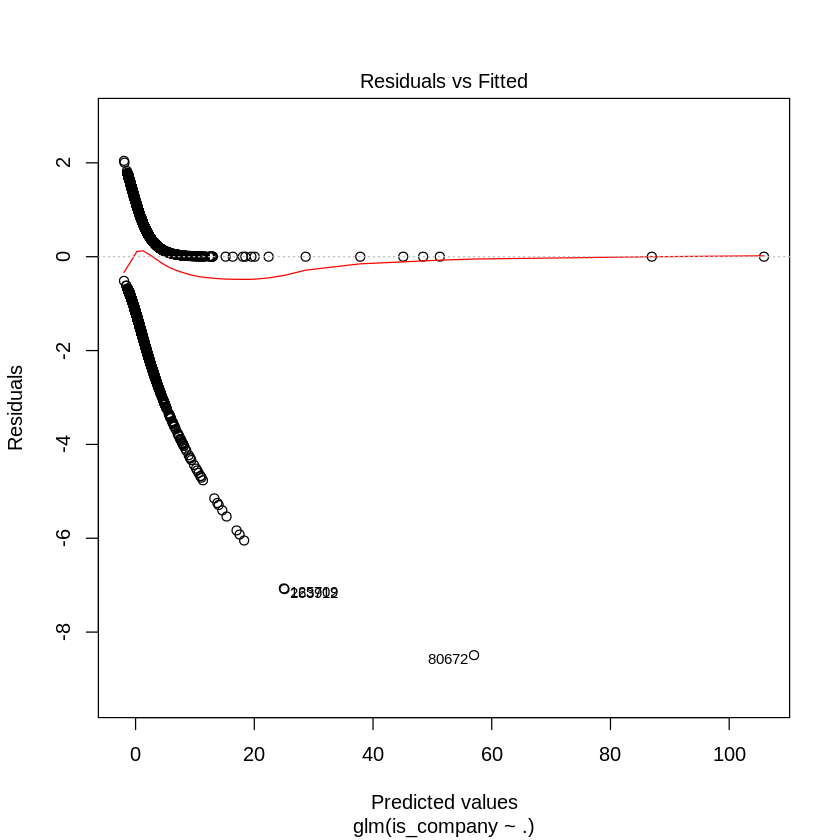

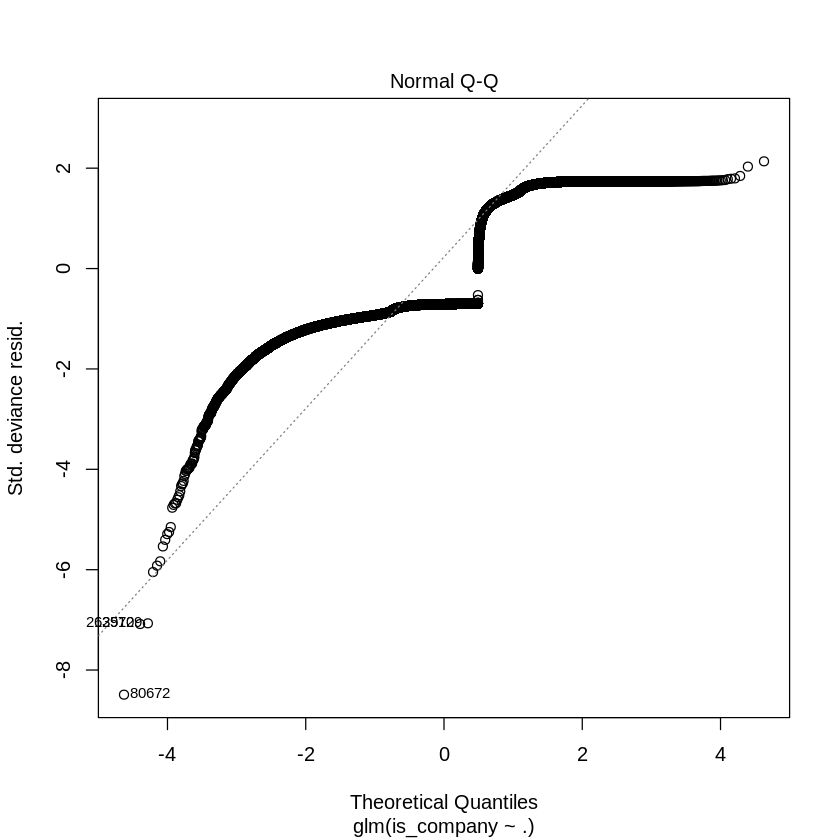

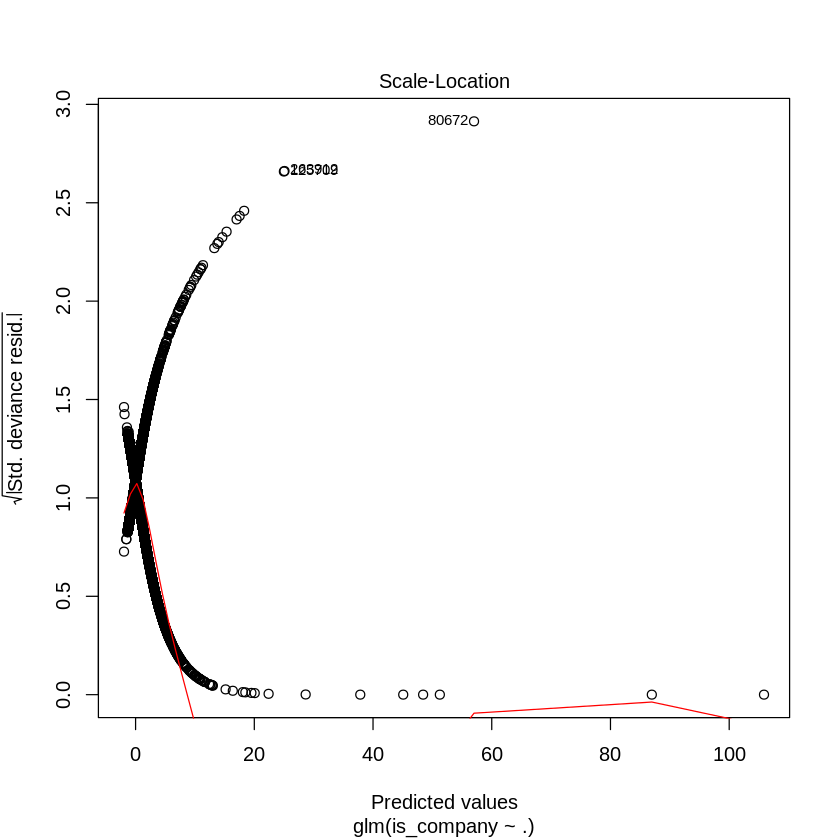

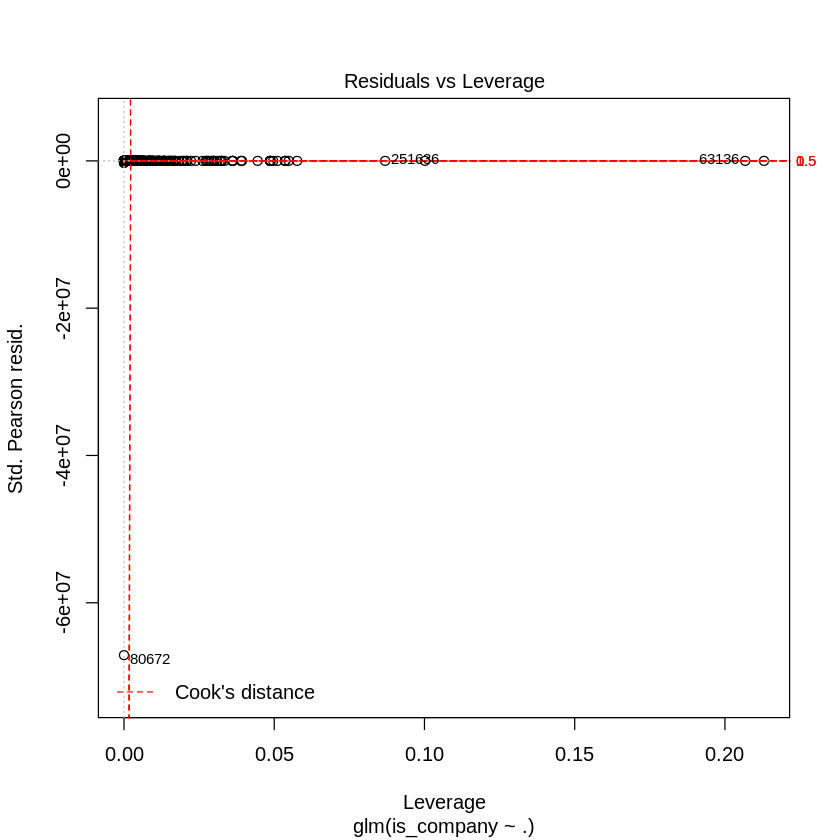

In [233]:
plot(m)

In [272]:
ind = 1:nrow(ut)
indTRAIN = sample(ind,round(0.7*length(ind)))
indTEST <- ind[-indTRAIN]
library(randomForest)

In [253]:
colnames(ut)

[1] "is_company"            "no_project"            "no_forked_project"    
 [4] "n_pkg_committed"       "n_direct_deps"         "n_recursive_deps"     
 [7] "n_issue"               "n_pull_req"            "n_issue_layer_0"      
[10] "n_pull_req_layer_0"    "n_issue_layer_1"       "n_pull_req_layer_1"   
[13] "n_issue_layer_more"    "n_pull_req_layer_more" "n_issue_layer_none"   
[16] "n_pull_req_layer_none" "n_pkg_issue"           "n_pkg_pull_req"       
[19] "n.non_pull_issue"      "n_pi_0"                "n_pi_1"               
[22] "n_pi_2"                "n_pi_n"

In [256]:
y = ut$is_company
ut$is_company = NULL

In [257]:
colnames(ut)= c('no_project' ,'no_forked_project' ,'no_package_committed_to', 'no_pkg_direct_dependency',
                            'no_package_recursive_dependency', 'no_issues', 'no_pull_request', 'no_issue_level_0',
               'no_pull_req_level_0','no_issue_level_1','no_pull_req_level_1','no_issue_level_2+',
                'no_pull_req_level_2+', 'no_issue_level_NONE','no_pull_req_level_NONE', 'no_pkg_issue_created',
                'no_pkg_pull_request_created', 'no_non_pull_request_issue', 'no_non_pull_request_issue_level_0',
                'no_non_pull_request_issue_level_1','no_non_pull_request_issue_level_2+',
                'no_non_pull_request_issue_level_NONE'
               )

In [273]:
rf <- randomForest(x=ut[indTRAIN,],
                   y=y[indTRAIN], ntree=50, importance=T)



In [274]:
pred <- predict(rf, ut[indTEST,], type='prob')[,2]

In [275]:
library(AUC)
auc(roc(pred,y[indTEST]))

[1] 0.6790982

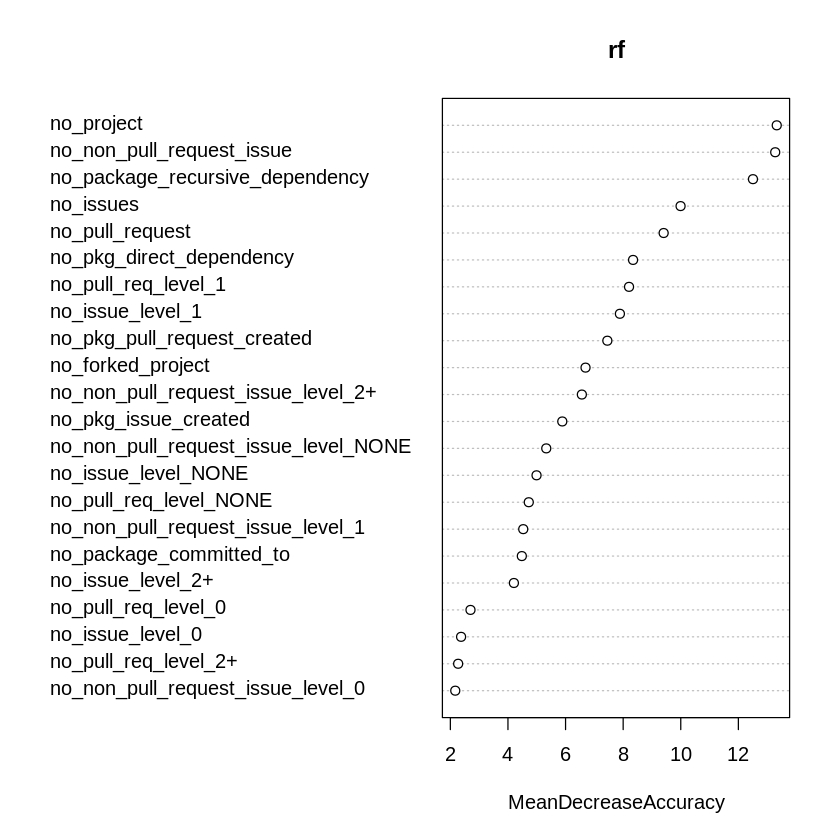

In [276]:
varImpPlot(rf, type=1)

specie,condition,value
sorgho,normal,27.093148
sorgho,stress,21.004318
sorgho,Nitrogen,22.764490
poacee,normal,3.834942
poacee,stress,15.749037
poacee,Nitrogen,15.336743
banana,normal,3.632602
banana,stress,18.047006
banana,Nitrogen,18.258073
triticum,normal,7.149537


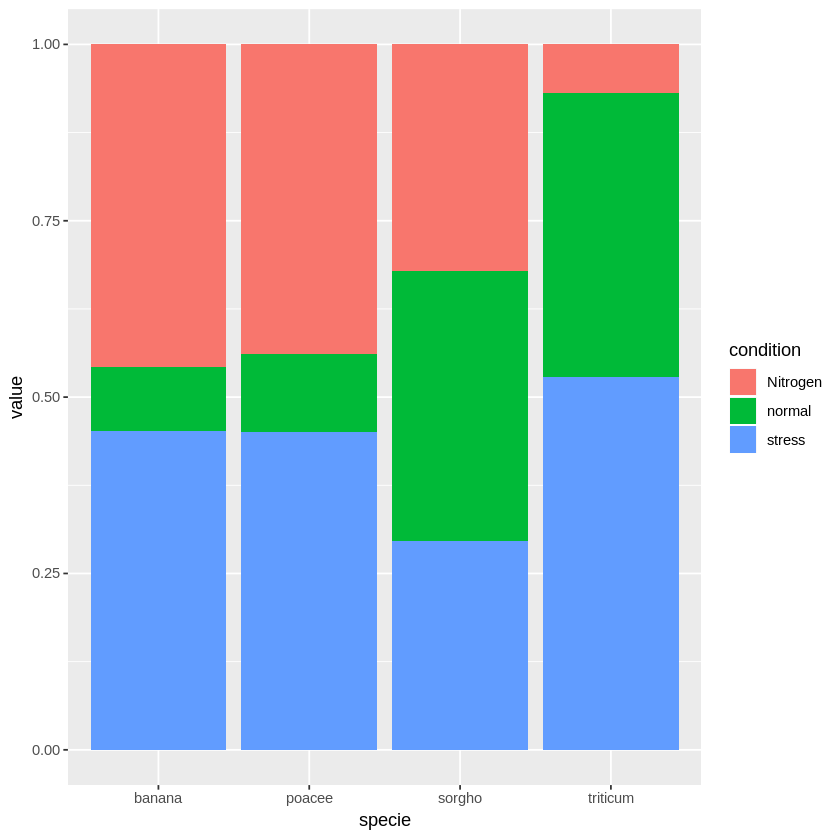

In [26]:
library(randomForest)
library(caret)
library(e1071)
library(doMC)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.
Loading required package: lattice
Loading required package: ggplot2

Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin

Loading required package: foreach
Loading required package: iterators
Loading required package: parallel


In [27]:
set.seed(1)
uip = user.info.nb[, c(1:3,5:8,27)]
colnames(uip) = c('is_company', 'no.project_committed_to', 'no.forked_project',
                 'no.direct_dependencies', 'no.transitive_dependencies', 'no.issues_created',
                 'no.PR_created', 'no.non_PR_issues')

indtrain <- sample(nrow(uip), 0.7*nrow(user.info), replace = FALSE)
TrainSet <- uip[indtrain,]
ValidSet <- uip[-indtrain,]
yTrain = TrainSet$is_company
TrainSet$is_company = NULL
yV = ValidSet$is_company
ValidSet$is_company = NULL
TrainSet = data.frame(sapply(TrainSet, function(x) log(x+1)))
ValidSet = data.frame(sapply(ValidSet, function(x) log(x+1)))


In [28]:
colnames(uip)[1]

[1] "is_company"

In [29]:
model2 = randomForest(TrainSet, yTrain, ntree = 500, importance = T)


In [10]:
# Predicting on train set
predTrain <- predict(model2, TrainSet, type = "class")
# Checking classification accuracy
confusionMatrix(predTrain, yTrain) 

Confusion Matrix and Statistics

          Reference
Prediction      0      1
         0 130943  26367
         1     69  33120
                                          
               Accuracy : 0.8612          
                 95% CI : (0.8597, 0.8628)
    No Information Rate : 0.6877          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6326          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9995          
            Specificity : 0.5568          
         Pos Pred Value : 0.8324          
         Neg Pred Value : 0.9979          
             Prevalence : 0.6877          
         Detection Rate : 0.6874          
   Detection Prevalence : 0.8258          
      Balanced Accuracy : 0.7781          
                                          
       'Positive' Class : 0               
                                          

In [11]:
# Predicting on train set
predtest <- predict(model2, ValidSet, type = "class")
# Checking classification accuracy
confusionMatrix(predtest, yV) 

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 51004 19062
         1  5278  6264
                                          
               Accuracy : 0.7017          
                 95% CI : (0.6986, 0.7049)
    No Information Rate : 0.6897          
    P-Value [Acc > NIR] : 3.615e-14       
                                          
                  Kappa : 0.1806          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9062          
            Specificity : 0.2473          
         Pos Pred Value : 0.7279          
         Neg Pred Value : 0.5427          
             Prevalence : 0.6897          
         Detection Rate : 0.6250          
   Detection Prevalence : 0.8586          
      Balanced Accuracy : 0.5768          
                                          
       'Positive' Class : 0               
                                          

In [12]:
library(AUC)
pred <- predict(model2, ValidSet, type="prob")[,2]
auc(roc(pred,yV))
auc(sensitivity(pred,yV))
auc(specificity(pred,yV))

AUC 0.3.0
Type AUCNews() to see the change log and ?AUC to get an overview.

Attaching package: 'AUC'

The following objects are masked from 'package:caret':

    sensitivity, specificity



[1] 0.6799071

[1] 0.6240875

[1] 0.4699234

In [13]:
auc(accuracy(pred, yV))

[1] 0.5299755

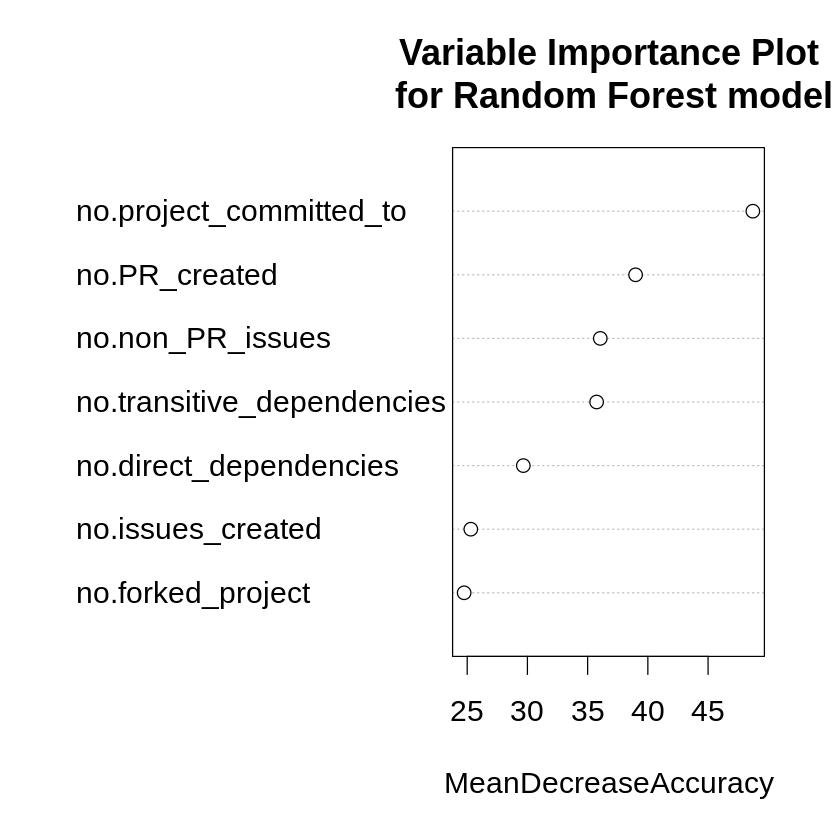

In [34]:
varImpPlot(model2, type = 1, main = 'Variable Importance Plot\n for Random Forest model', cex = 1.5)